In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import sys
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
sys.version

'3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]'

In [3]:
df = pd.read_csv(r"Automobile_data.csv")

## Tampilkan review 5 data awal

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
df = df.rename(columns={'make':'merk_mobil'})

## Cek tipe data dan ukuran di dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   merk_mobil         205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
df.shape

(205, 26)

## Cek statistik pada dataset

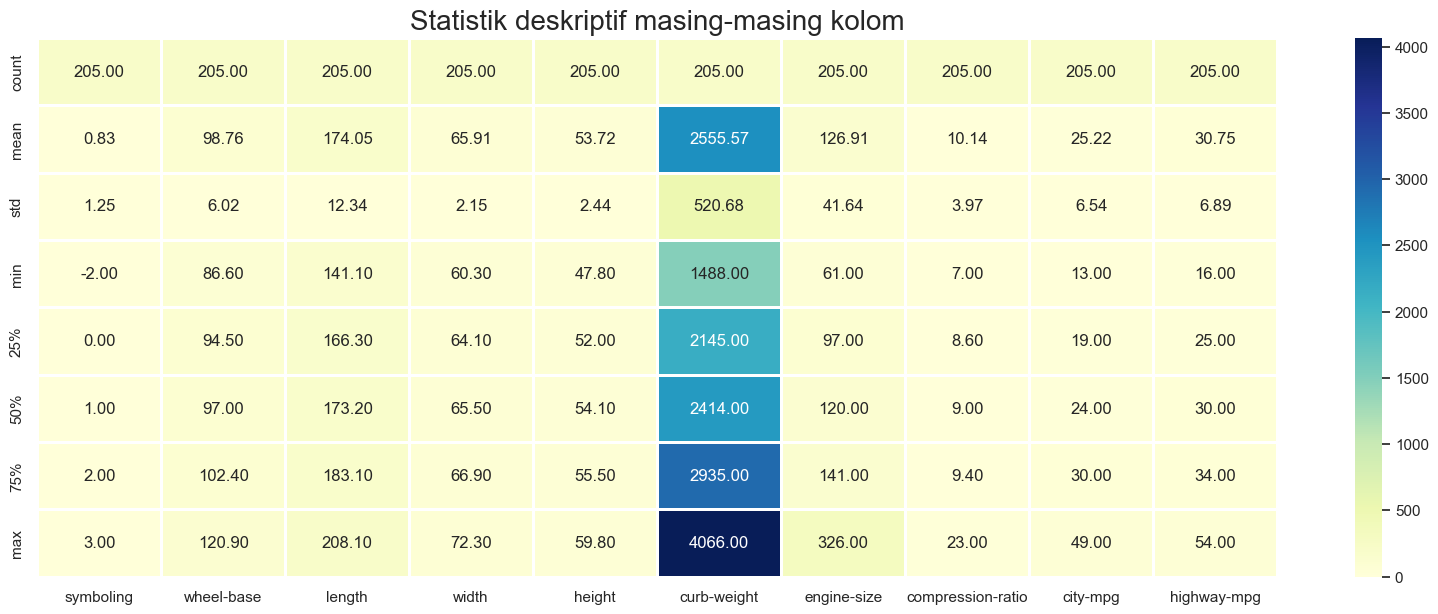

In [8]:
plt.figure(figsize=(20,7))
sns.heatmap(df.describe(), annot = True, cmap = 'YlGnBu',fmt=".2f", linewidths=1, linecolor='white', cbar=True)
plt.title('Statistik deskriptif masing-masing kolom', size = 20);

# Cleaning data

## Cek apakah ada missing values

In [9]:
df.isnull().sum()

symboling            0
normalized-losses    0
merk_mobil           0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<Axes: >

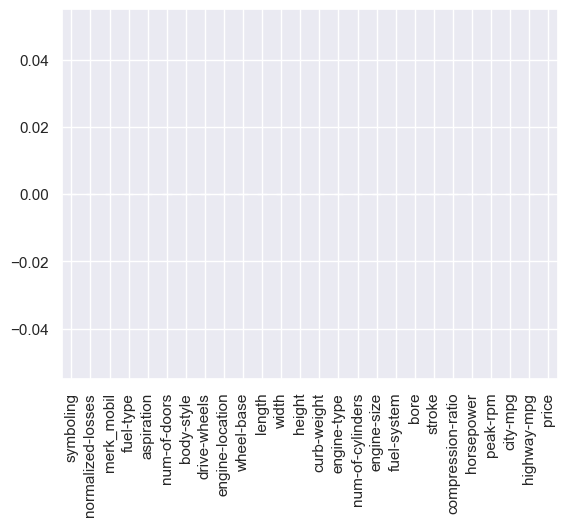

In [10]:
df.isnull().sum().plot(kind='bar')

# Cek semua kolom yang memiliki ?


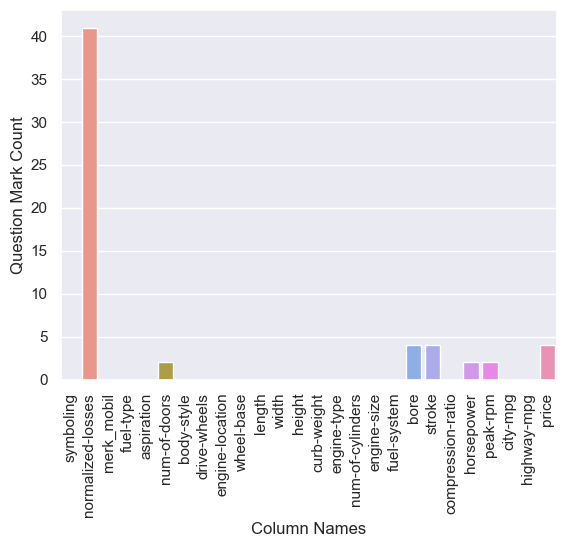

In [11]:
question_mark_counts = df.apply(lambda x: x.astype(str).str.count('\?').sum())
data_for_visualization = pd.DataFrame({
    'Column Names': question_mark_counts.index,
    'Question Mark Count': question_mark_counts.values
})
data_for_visualization
sns.barplot(data = data_for_visualization, x = 'Column Names', y = 'Question Mark Count')
plt.xticks(rotation = 90);

## Cek berapa banyak baris yang terdapat simbol '?' pada kolom normalized-losses dan cleaning

In [12]:
df['normalized-losses'].loc[df['normalized-losses']=='?'].count()

41

## Mengisi nilai '?' dengan rata-rata, namun perlu merubah tipe data dari kolom normalized-losses dari object ke integer

In [13]:
# cari terlebih dahulu rata-rata nilainya dan pisahkan '?' agar tidak error saat pencarian mean
normalized_baru = df['normalized-losses'].loc[df['normalized-losses']!='?']
normalized_median = normalized_baru.astype(str).astype(int).median()
#setelah di dapat rata-rata gantikan '?' dengan nilai rata-rata
df['normalized-losses'] = df['normalized-losses'].replace('?',normalized_median).astype(int)
pd.DataFrame(df['normalized-losses'].head())

,normalized-losses
0,115
1,115
2,115
3,164
4,164


## Cleaning pada kolom price

In [14]:
#hitung ada berapa banyak data yang bertipe non-numeric (#cara1)
df['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [15]:
#cara 2 sama seperti mengecek nilai pada kolom normalized-losses
df['price'].loc[df['price']=='?'].count()

4

In [16]:
#List nilai yang tidak bersifat numeric
df['price'].loc[df['price'].str.isnumeric()==False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [17]:
#isi missing value dengan rata-rata dan rubah terlebih dahulu tipe data ke integer
price_filter = df['price'].loc[df['price']!='?']
price_median = price_filter.astype(str).astype(int).median()
df['price'] = df['price'].replace('?',price_median).astype(int)
df['price'].head(10)

0    13495
1    16500
2    16500
3    13950
4    17450
5    15250
6    17710
7    18920
8    23875
9    10295
Name: price, dtype: int32

## Cleaning horsepower

In [18]:
#cek nilai non numeric pada horsepower
df['horsepower'].str.isnumeric().value_counts()

True     203
False      2
Name: horsepower, dtype: int64

In [19]:
df['horsepower'].loc[df['horsepower'].str.isnumeric()==False]

130    ?
131    ?
Name: horsepower, dtype: object

In [20]:
#isi nilai ? dengan rata-rata
horse_filter = df['horsepower'].loc[df['horsepower']!='?']
horse_median = horse_filter.astype(str).astype(int).median()
df['horsepower'] = df['horsepower'].replace('?',horse_median).astype(int)

In [21]:
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int32

In [22]:
#cek outliers
df['horsepower'].loc[df['horsepower']>10000]

Series([], Name: horsepower, dtype: int32)

## Cleaning bore

In [23]:
# cari nomor yang tidak  valid
df['bore'].loc[df['bore']=='?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [24]:
#isi dengan rata-rata
bore_filter = df['bore'].loc[df['bore']!='?']
bore_median = bore_filter.astype(str).astype(float).median()
df['bore'] = df['bore'].replace('?',bore_median).astype(float)

In [25]:
#cek mssing values
df['bore'].loc[df['bore']=='?'].count()

0

In [26]:
df['bore']

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: float64

## Cleaning stroke

In [27]:
# cari angka yang tidak  valid
df['stroke'].loc[df['stroke']=='?']

55    ?
56    ?
57    ?
58    ?
Name: stroke, dtype: object

In [28]:
#isi data yang kosong dengan rata-rata
stroke_filter = df['stroke'].loc[df['stroke'] !='?']
stroke_median = stroke_filter.astype(str).astype(float).median()
df['stroke'] = df['stroke'].replace('?',stroke_median).astype(float)

In [29]:
#cek angka invalid
df['stroke'].loc[df['stroke']=='?'].count()

0

In [30]:
df['stroke']

0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
       ... 
200    3.15
201    3.15
202    2.87
203    3.40
204    3.15
Name: stroke, Length: 205, dtype: float64

## Cleaning peak-rpm

In [31]:
#cari angka tidak valid
df['peak-rpm'].loc[df['peak-rpm']=='?']

130    ?
131    ?
Name: peak-rpm, dtype: object

In [32]:
#ganti nilai tidak valid dengan mean
rpm_filter = df['peak-rpm'].loc[df['peak-rpm']!='?']
rpm_median = rpm_filter.astype(str).astype(float).median()
df['peak-rpm'] = df['peak-rpm'].replace('?',rpm_median).astype(float)

In [33]:
df['peak-rpm'].loc[df['peak-rpm']=='?'].count()

0

In [34]:
df['peak-rpm']

0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
        ...  
200    5400.0
201    5300.0
202    5500.0
203    4800.0
204    5400.0
Name: peak-rpm, Length: 205, dtype: float64

## cleaning num-of-doors data

In [35]:
#cari angka tidak valid
df[df['num-of-doors']=='?']['num-of-doors'].count()

2

In [36]:
# num-of-doors merupakan tipe data object sehingga tidak bisa diisi dengan mean
# maka harus dihapus data yang mengandung '?'
df = df[df['num-of-doors']!='?']

In [37]:
df['num-of-doors'].loc[df['num-of-doors']=='?']

Series([], Name: num-of-doors, dtype: object)

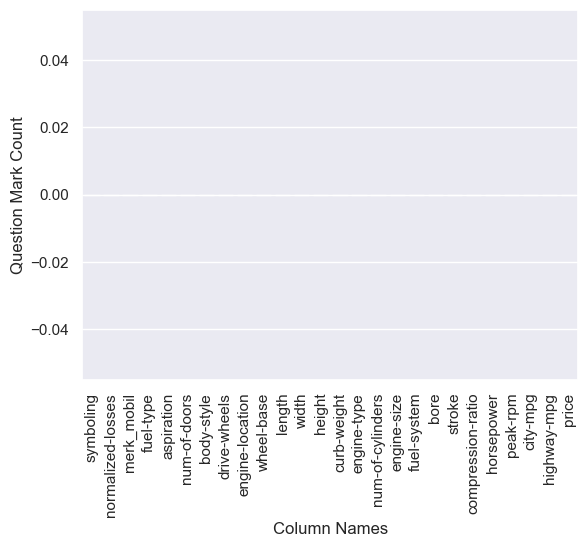

In [38]:
question_mark_counts = df.apply(lambda x: x.astype(str).str.count('\?').sum())
data_for_visualization = pd.DataFrame({
    'Column Names': question_mark_counts.index,
    'Question Mark Count': question_mark_counts.values
})
data_for_visualization
sns.barplot(data = data_for_visualization, x = 'Column Names', y = 'Question Mark Count')
plt.xticks(rotation = 90);

## Histogram tingkat resiko asuransi

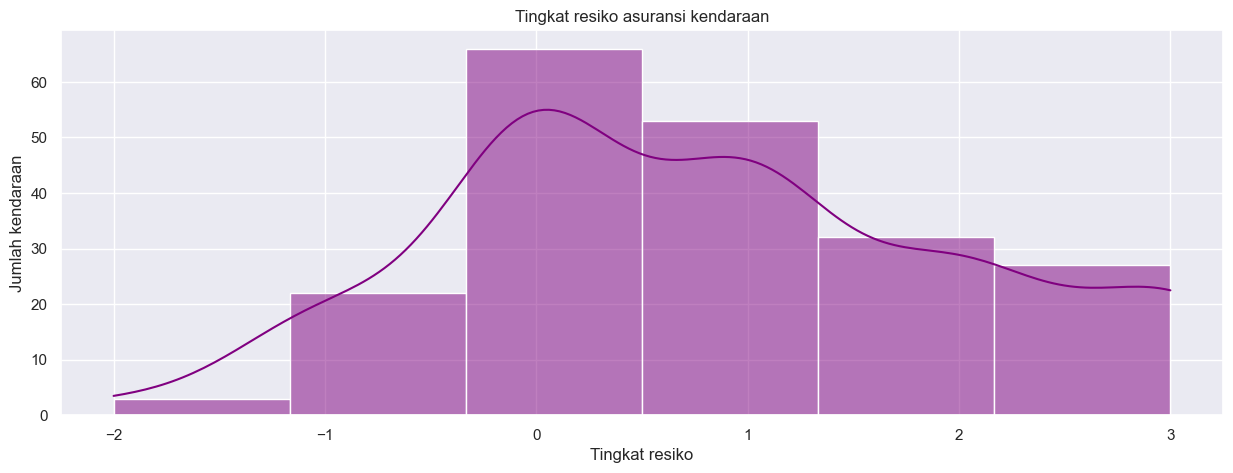

In [39]:
plt.figure(figsize=(15,5))
# there is 6 level of risk, so let's divide into 6 bins
sns.histplot(x = 'symboling', data = df, bins = 6, color = 'purple',kde = True)
plt.title("Tingkat resiko asuransi kendaraan")
plt.ylabel('Jumlah kendaraan')
plt.xlabel('Tingkat resiko');

<Axes: xlabel='symboling'>

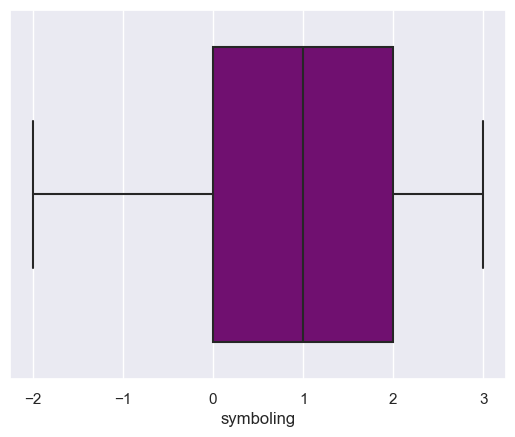

In [40]:
sns.boxplot(data = df, x = 'symboling', color = 'purple')

## Histogram Normalized losses

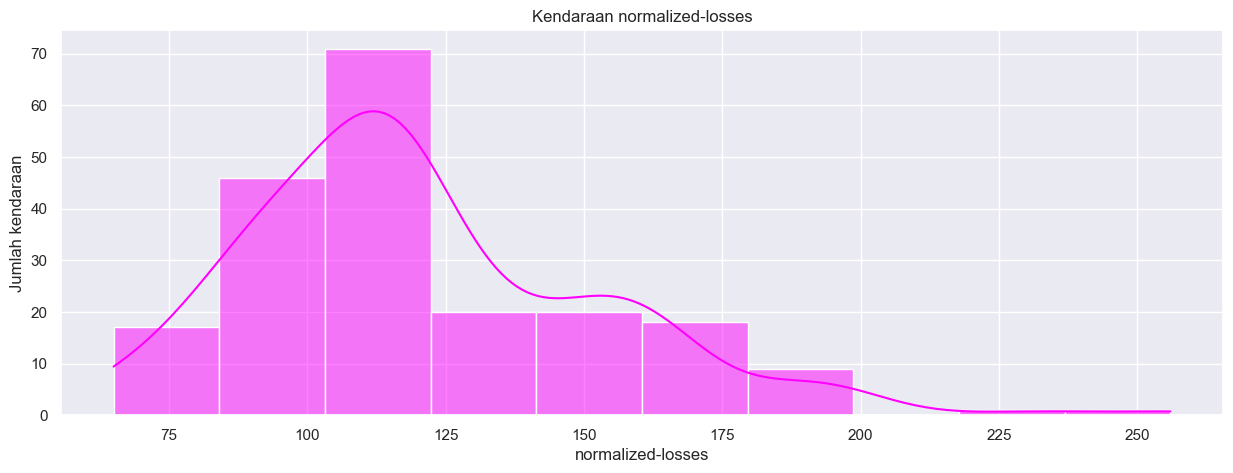

In [41]:
plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'normalized-losses', bins = 10, color = 'magenta',kde = True)
plt.title("Kendaraan normalized-losses")
plt.ylabel('Jumlah kendaraan')
plt.xlabel('normalized-losses');

<Axes: xlabel='normalized-losses'>

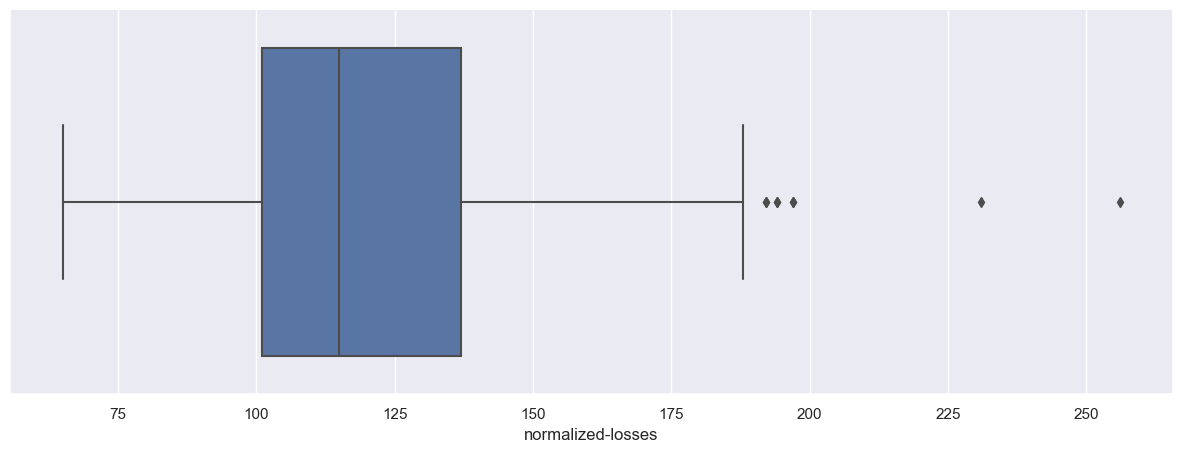

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = 'normalized-losses')

<Axes: xlabel='normalized-losses'>

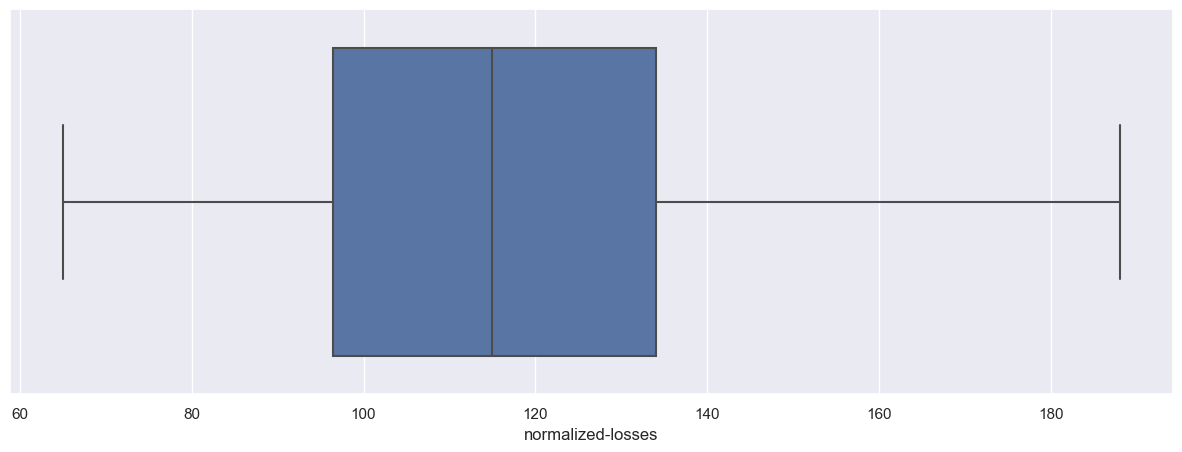

In [43]:
#handling outliers
Q1 = df['normalized-losses'].quantile(0.25)
Q3 = df['normalized-losses'].quantile(0.75)
IQR = Q3-Q1
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR
df = df[~((df['normalized-losses']<batas_bawah)|(df['normalized-losses']>batas_atas))]
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = 'normalized-losses')

## Histogram horsepower

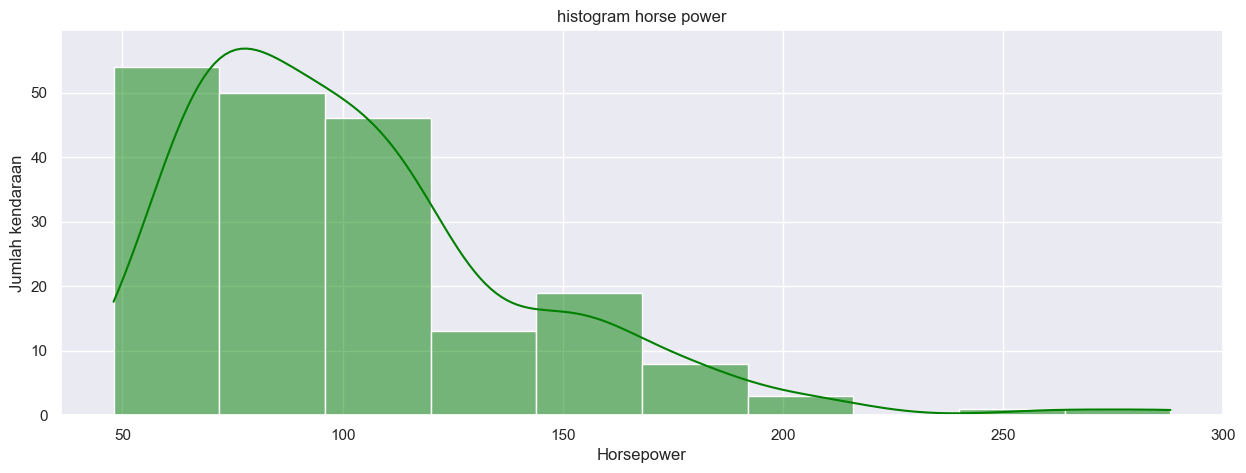

In [44]:
plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'horsepower', bins = 10, kde = True, color = 'green')
plt.title("histogram horse power")
plt.ylabel('Jumlah kendaraan')
plt.xlabel('Horsepower')
plt.xticks(rotation = 0);

<Axes: xlabel='horsepower'>

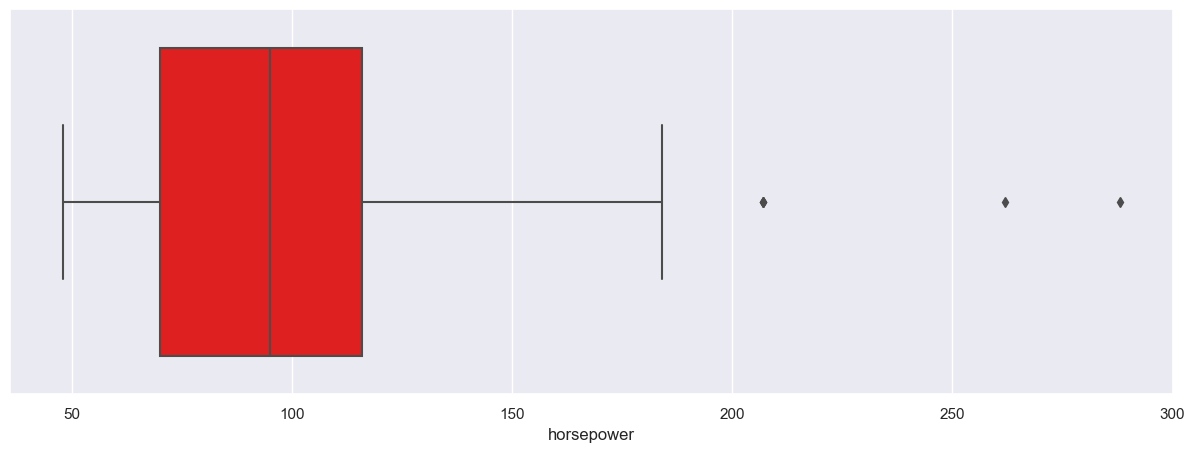

In [45]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = 'horsepower', color = 'red')

<Axes: xlabel='horsepower'>

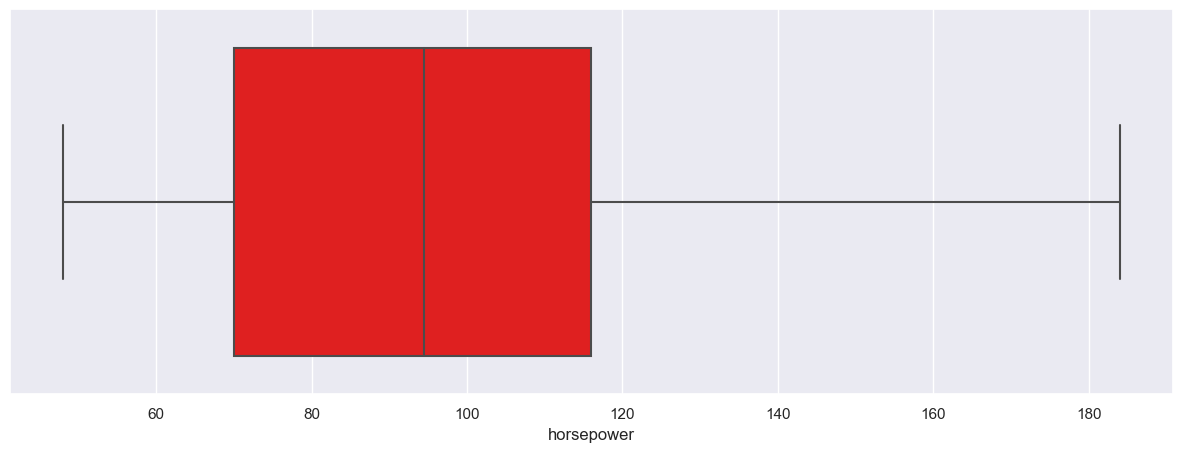

In [46]:
#tangani outliers
#handling outliers
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3-Q1
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR
df= df[~((df['horsepower'] < batas_bawah) | (df['horsepower'] > batas_atas))]
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = 'horsepower', color = 'red')

## Curb weight histogram

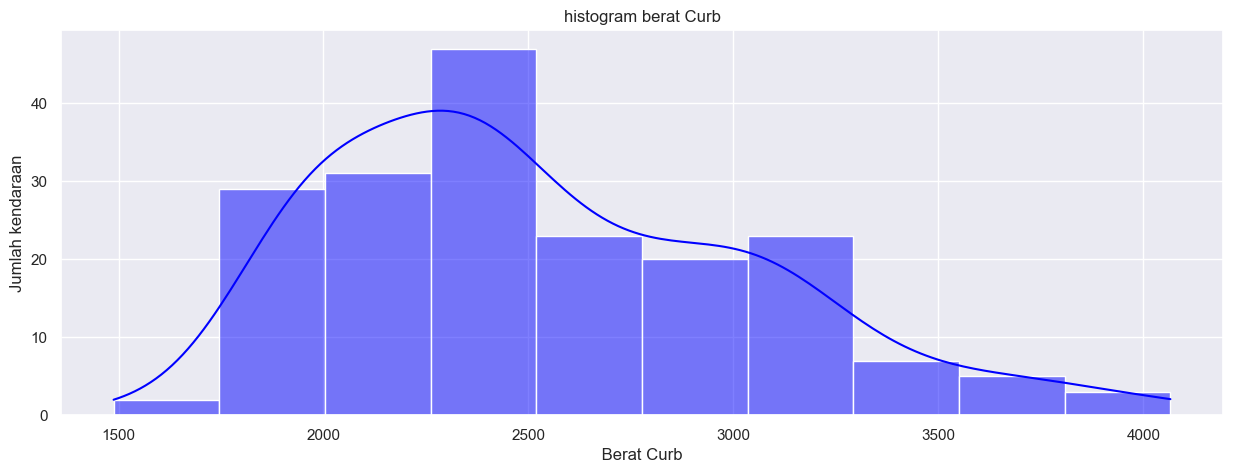

In [47]:
plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'curb-weight',kde = True, color = 'blue')
plt.title("histogram berat Curb")
plt.ylabel('Jumlah kendaraan')
plt.xlabel(' Berat Curb ')
plt.xticks(rotation = 0);

<Axes: xlabel='curb-weight'>

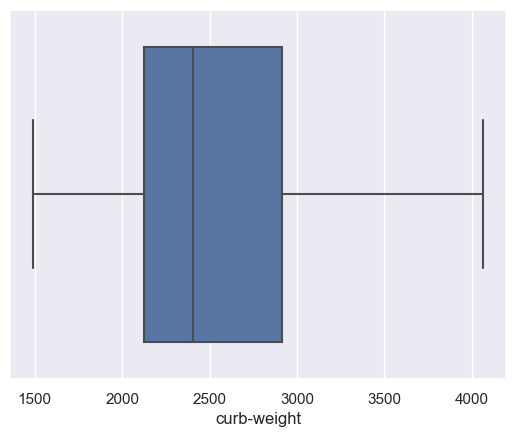

In [48]:
sns.boxplot(data = df, x = 'curb-weight')

C:\Users\amati\AppData\Local\Temp\ipykernel_13092\906058688.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = 'price', kde = True, palette = 'Set1')


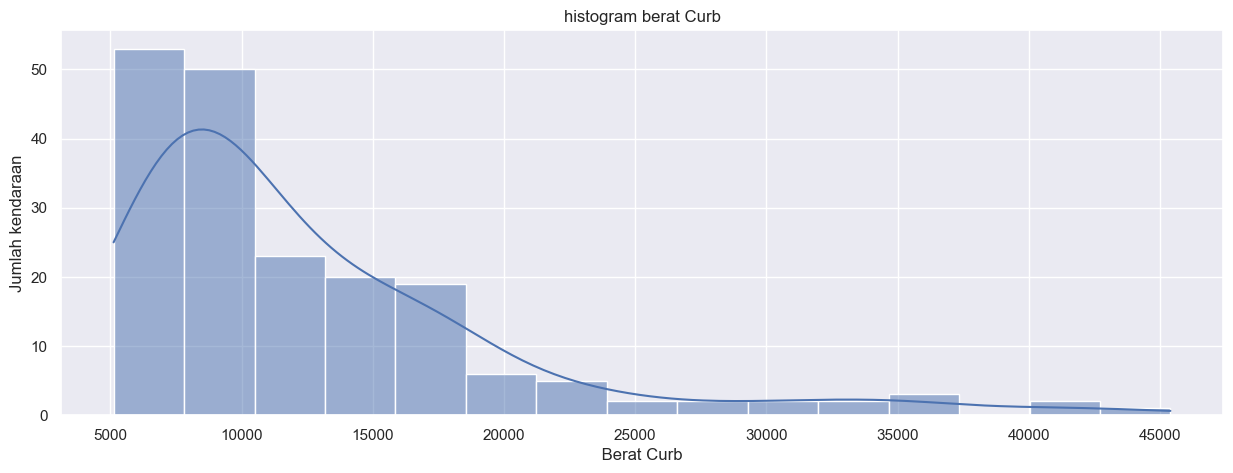

In [49]:
plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'price', kde = True, palette = 'Set1')
plt.title("histogram berat Curb")
plt.ylabel('Jumlah kendaraan')
plt.xlabel(' Berat Curb ')
plt.xticks(rotation = 0);

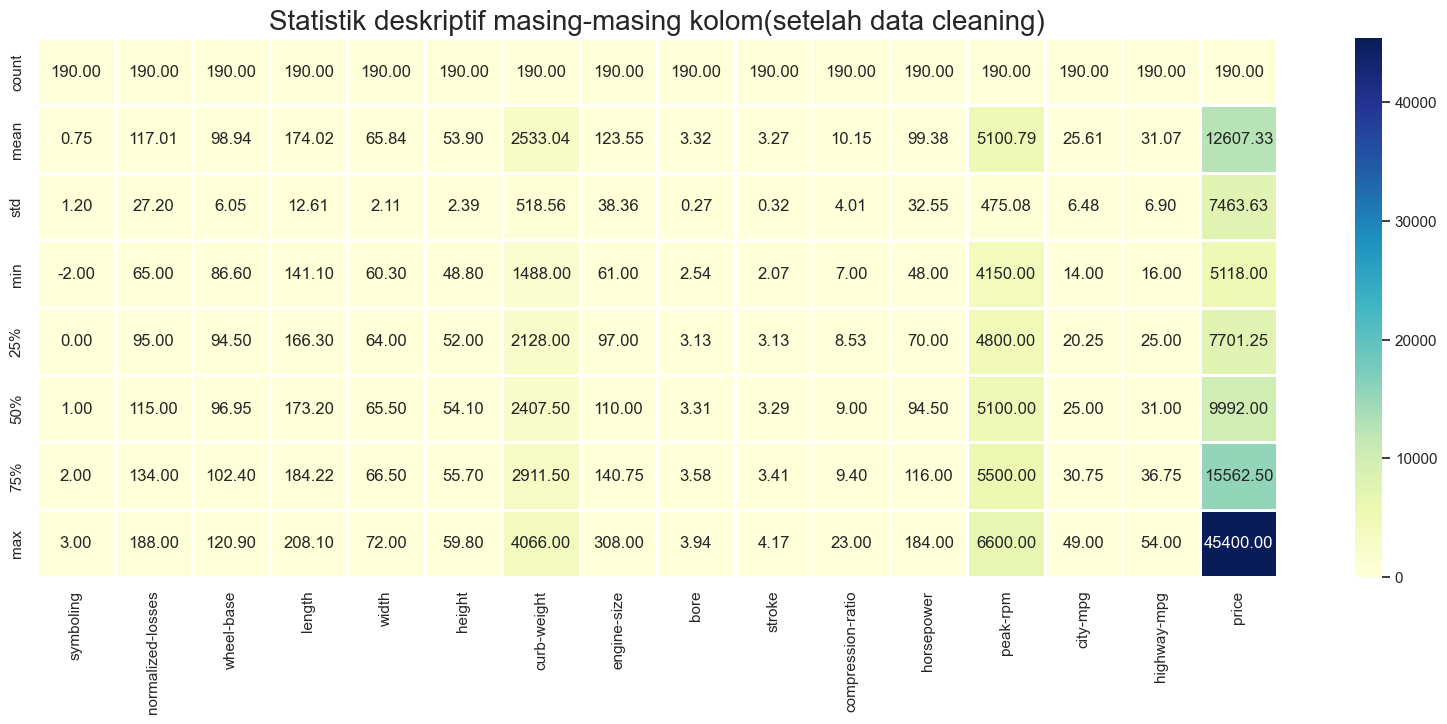

In [50]:
plt.figure(figsize=(20,7))
sns.heatmap(df.describe(), annot = True, cmap = 'YlGnBu',fmt=".2f", linewidths=1, linecolor='white', cbar=True)
plt.title('Statistik deskriptif masing-masing kolom(setelah data cleaning)', size = 20);

# Export data yang bersih ke CSV

In [51]:
# df.to_csv("C:/Users/amati/Latihan Prakerja/Automobile_data_bersih.csv")

# Eksplorasi Data

## Diagram frekuensi kendaraan

In [52]:
freq_make = df[['merk_mobil']].value_counts()
freq_make = freq_make.reset_index().head(10)
freq_make.rename(columns = {0:'jumlah mobil'}, inplace = True)
freq_make

,merk_mobil,jumlah mobil
0,toyota,30
1,mazda,16
2,nissan,15
3,mitsubishi,13
4,honda,13
5,subaru,12
6,volkswagen,11
7,peugot,11
8,volvo,11
9,mercedes-benz,8


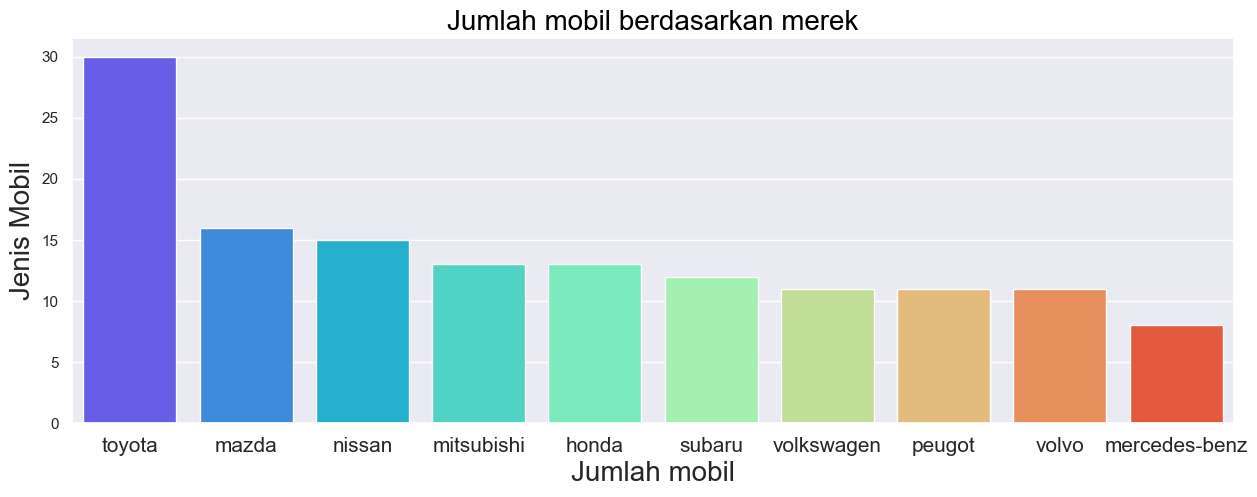

In [53]:
plt.figure(figsize=(15,5))
sns.barplot(data = freq_make, x = 'merk_mobil', y = 'jumlah mobil', palette = 'rainbow')
plt.title ('Jumlah mobil berdasarkan merek', size = 20, color = 'black')
plt.xlabel('Jumlah mobil', size = 20)
plt.ylabel('Jenis Mobil', size = 20)
plt.xticks(rotation = 0, size =15);

## Bar chart jenis BBM

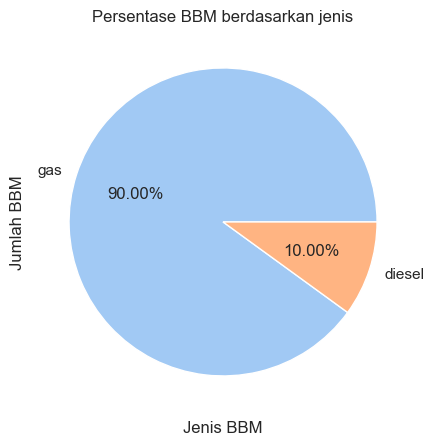

In [54]:
plt.figure(figsize=(15,5))
df['fuel-type'].value_counts().plot(kind = 'pie',autopct='%.2f%%',  colors=sns.color_palette('pastel'))
plt.title("Persentase BBM berdasarkan jenis")
plt.ylabel('Jumlah BBM')
plt.xlabel('Jenis BBM')
plt.xticks(rotation = 0);

## Tipe BBM berdasarkan standar

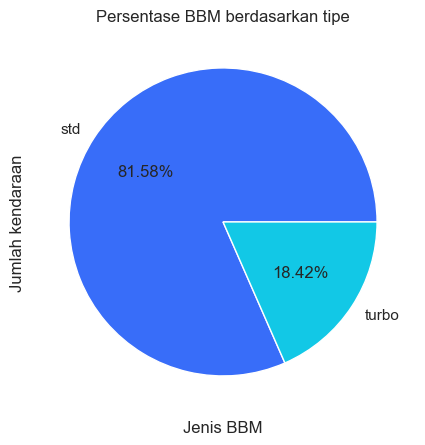

In [55]:
plt.figure(figsize=(15,5))
df['aspiration'].value_counts().plot.pie(autopct = '%.2f%%',  colors=sns.color_palette('rainbow'))
plt.title("Persentase BBM berdasarkan tipe")
plt.ylabel('Jumlah kendaraan')
plt.xlabel('Jenis BBM')
plt.xticks(rotation = 0);

## Bar char roda penggerak

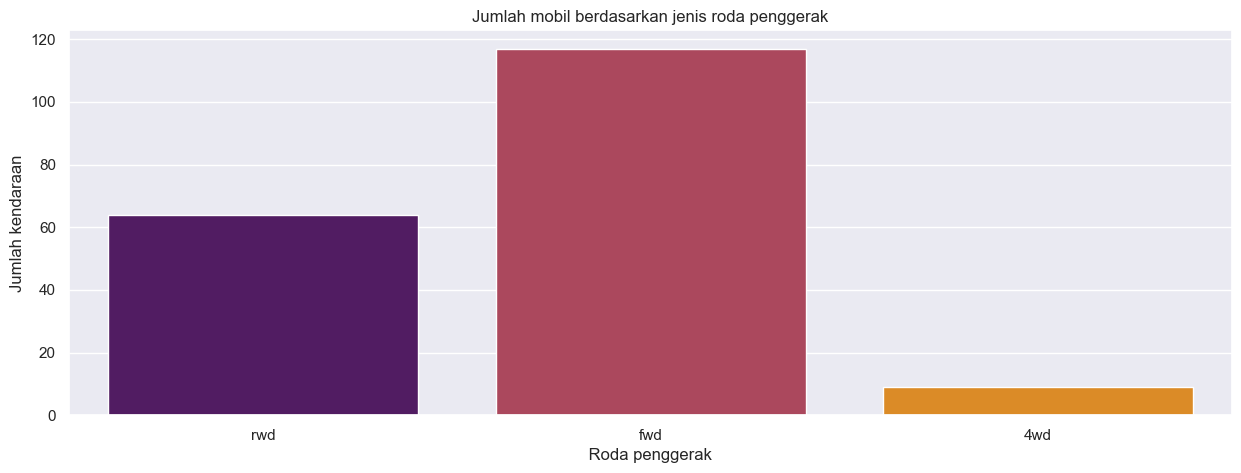

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'drive-wheels', palette = 'inferno')
plt.title("Jumlah mobil berdasarkan jenis roda penggerak")
plt.ylabel('Jumlah kendaraan')
plt.xlabel(' Roda penggerak ')
plt.xticks(rotation = 0);

## Diagram frekuensi jumlah pintu

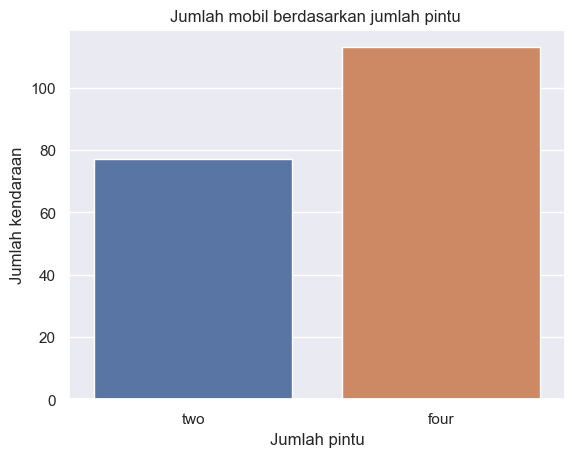

In [57]:
sns.countplot(data = df, x = 'num-of-doors', palette = 'deep')
plt.title("Jumlah mobil berdasarkan jumlah pintu ")
plt.ylabel('Jumlah kendaraan')
plt.xlabel('Jumlah pintu')
plt.xticks(rotation = 0);

## Analisis korelasi

C:\Users\amati\AppData\Local\Temp\ipykernel_13092\2279751311.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


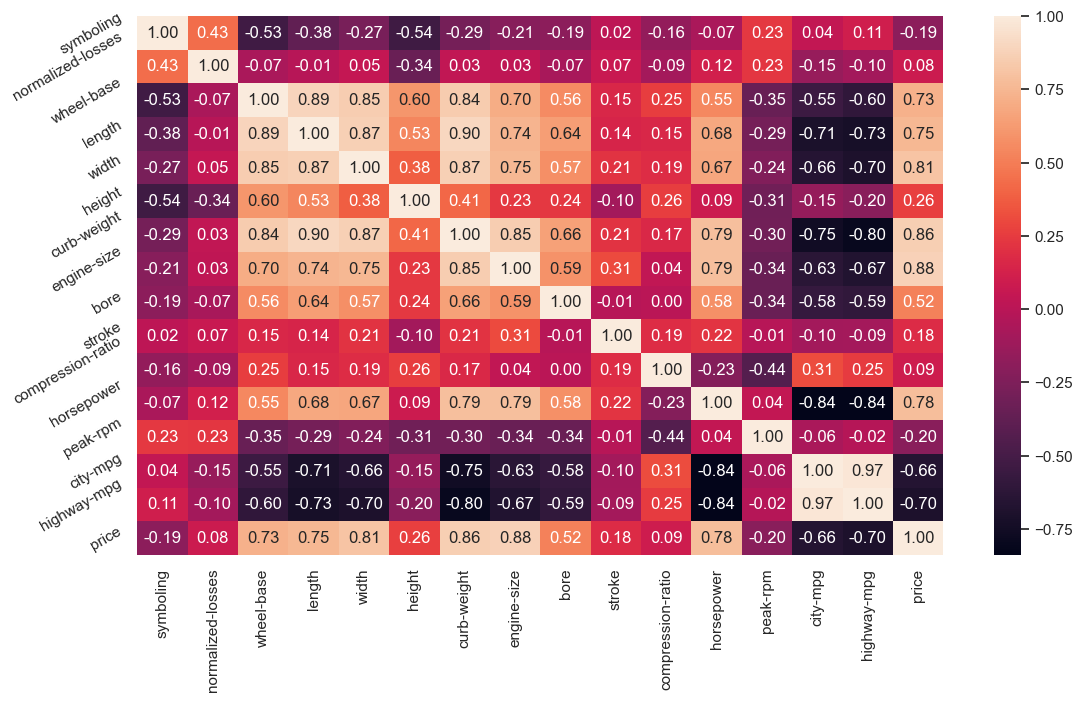

In [58]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Analisis Bivariat

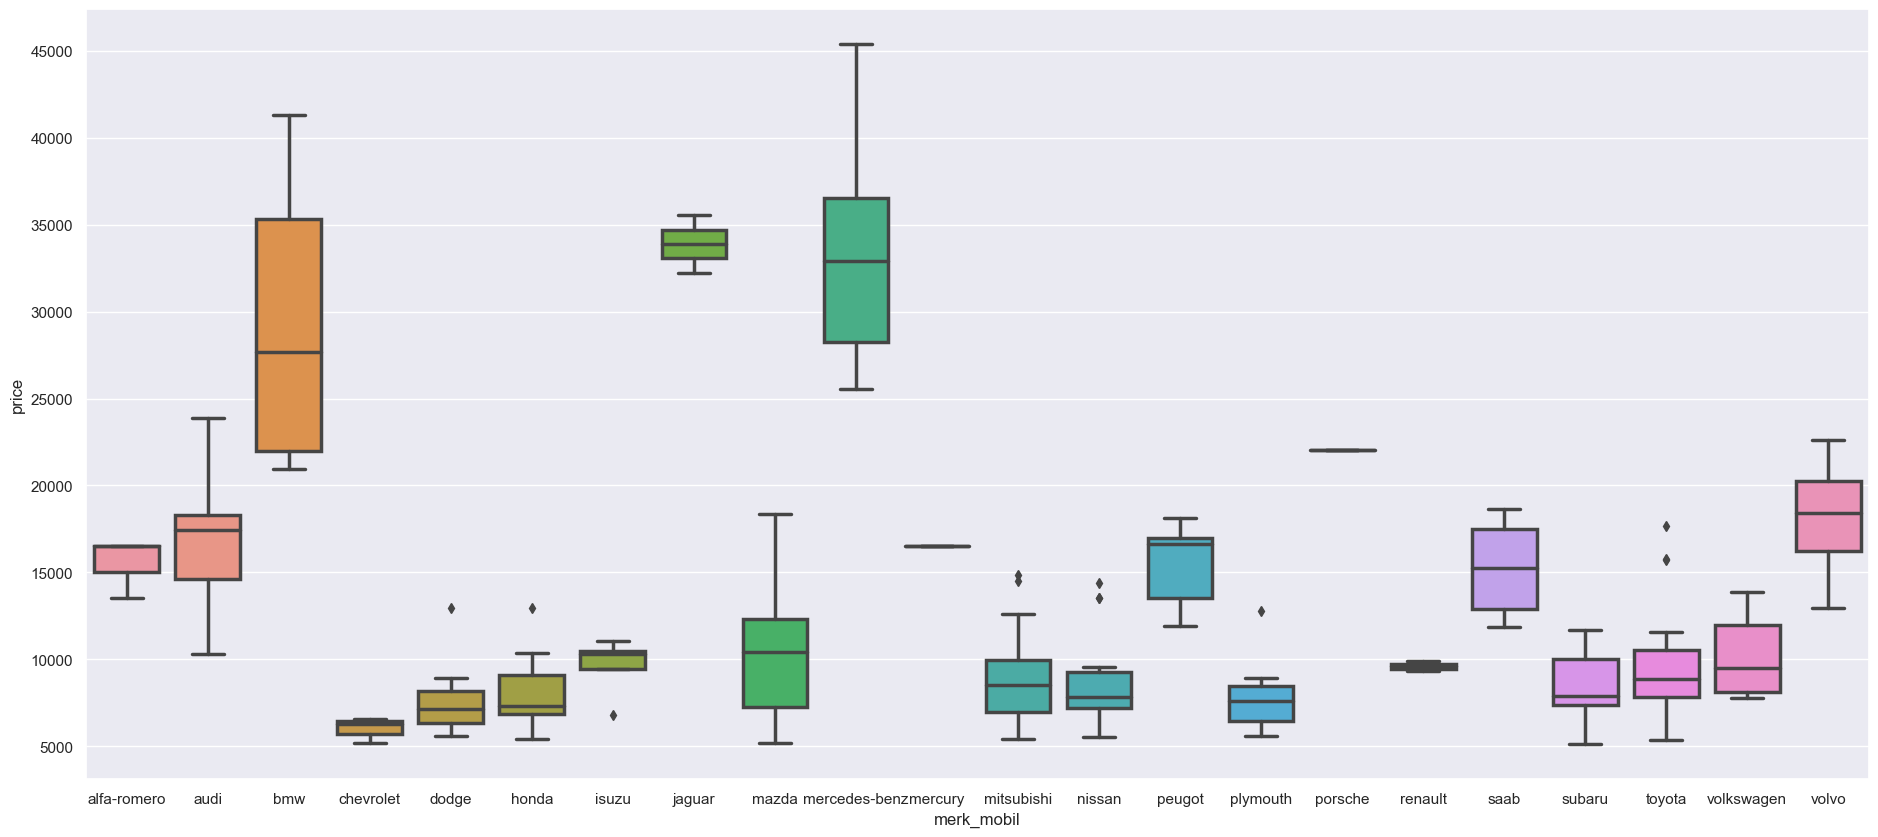

In [59]:
plt.rcParams['figure.figsize'] = (23,10)
Ab = sns.boxplot(x='merk_mobil', y='price', data = df)

In [60]:
fig = Ab.get_figure()
fig.savefig("out.png") 

## Scatter plot of price dan engine size

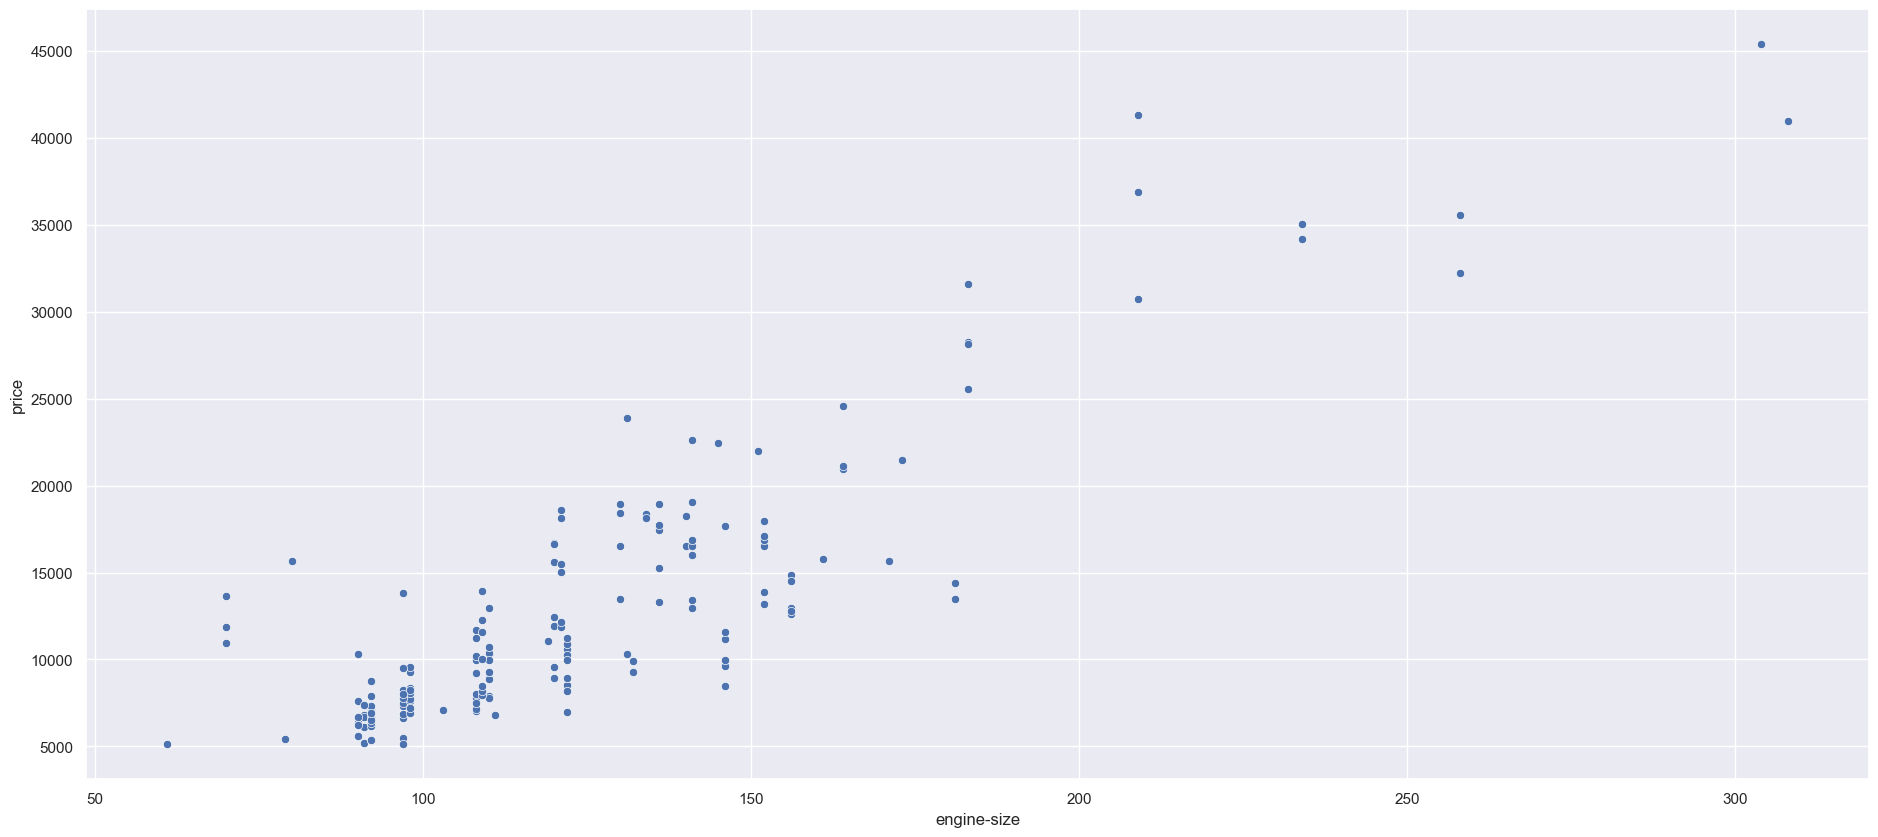

In [61]:
pe = sns.scatterplot(x = 'engine-size',y= 'price',data = df)

## Scatter plot dari normalized losses dan symboling

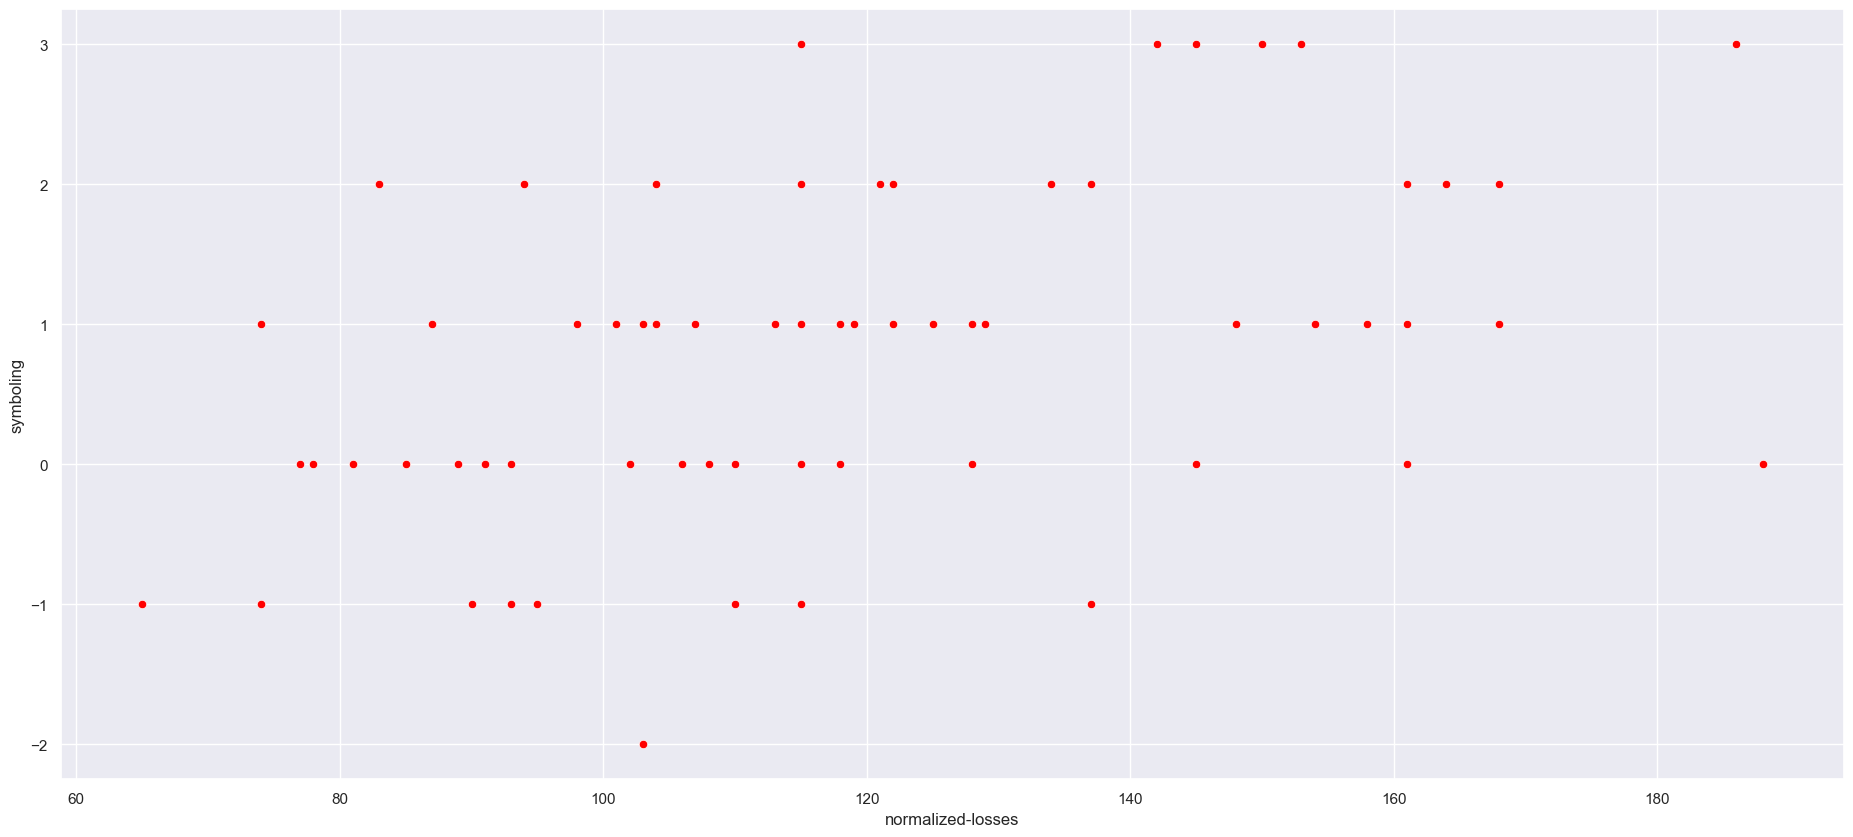

In [62]:
ns = sns.scatterplot(x = 'normalized-losses',y ='symboling',data = df, color = 'red')

## Scatter plot engine size dan Peak RPM

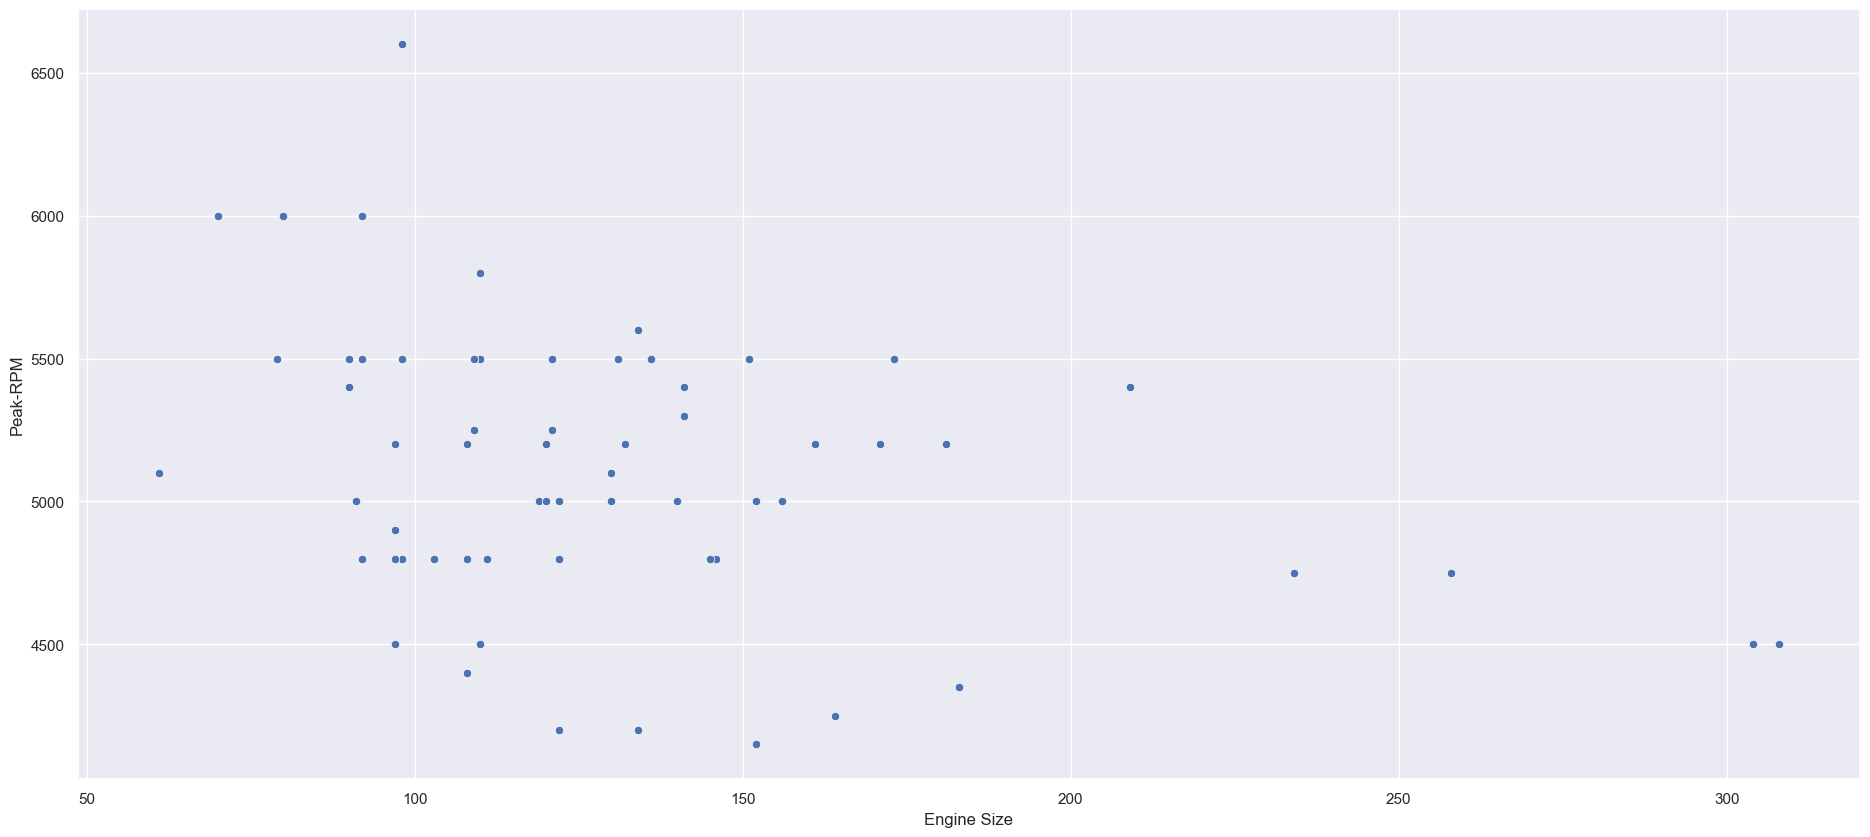

In [63]:
sns.scatterplot(data = df, x = 'engine-size', y = 'peak-rpm')
plt.xlabel('Engine Size')
plt.ylabel('Peak-RPM');

## Scatter plot City dan Highway MPG, Berat Curb berdasarkan Make dari mobil

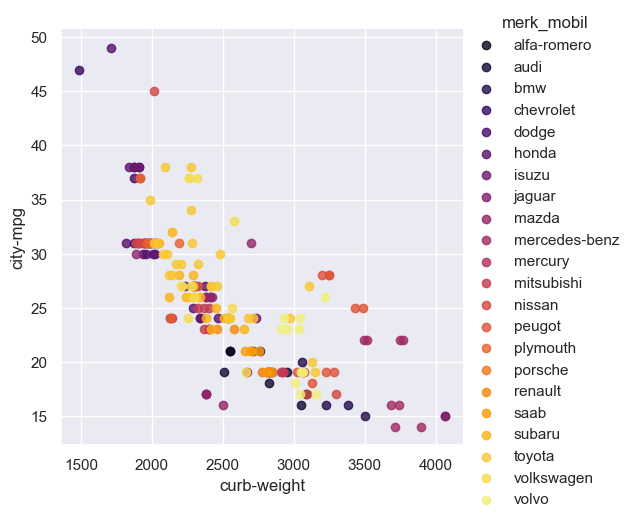

In [64]:
Spc = sns.lmplot(x = 'curb-weight',y ='city-mpg', data = df, hue = 'merk_mobil', fit_reg = False, palette = 'inferno')

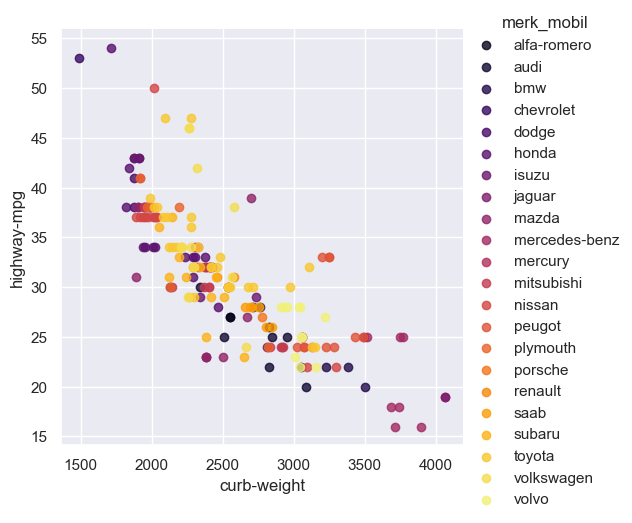

In [65]:
Sph = sns.lmplot(x = 'curb-weight',y = 'highway-mpg', data = df, hue = 'merk_mobil', fit_reg = False, palette = 'inferno')

## Roda dan City MPG bar char

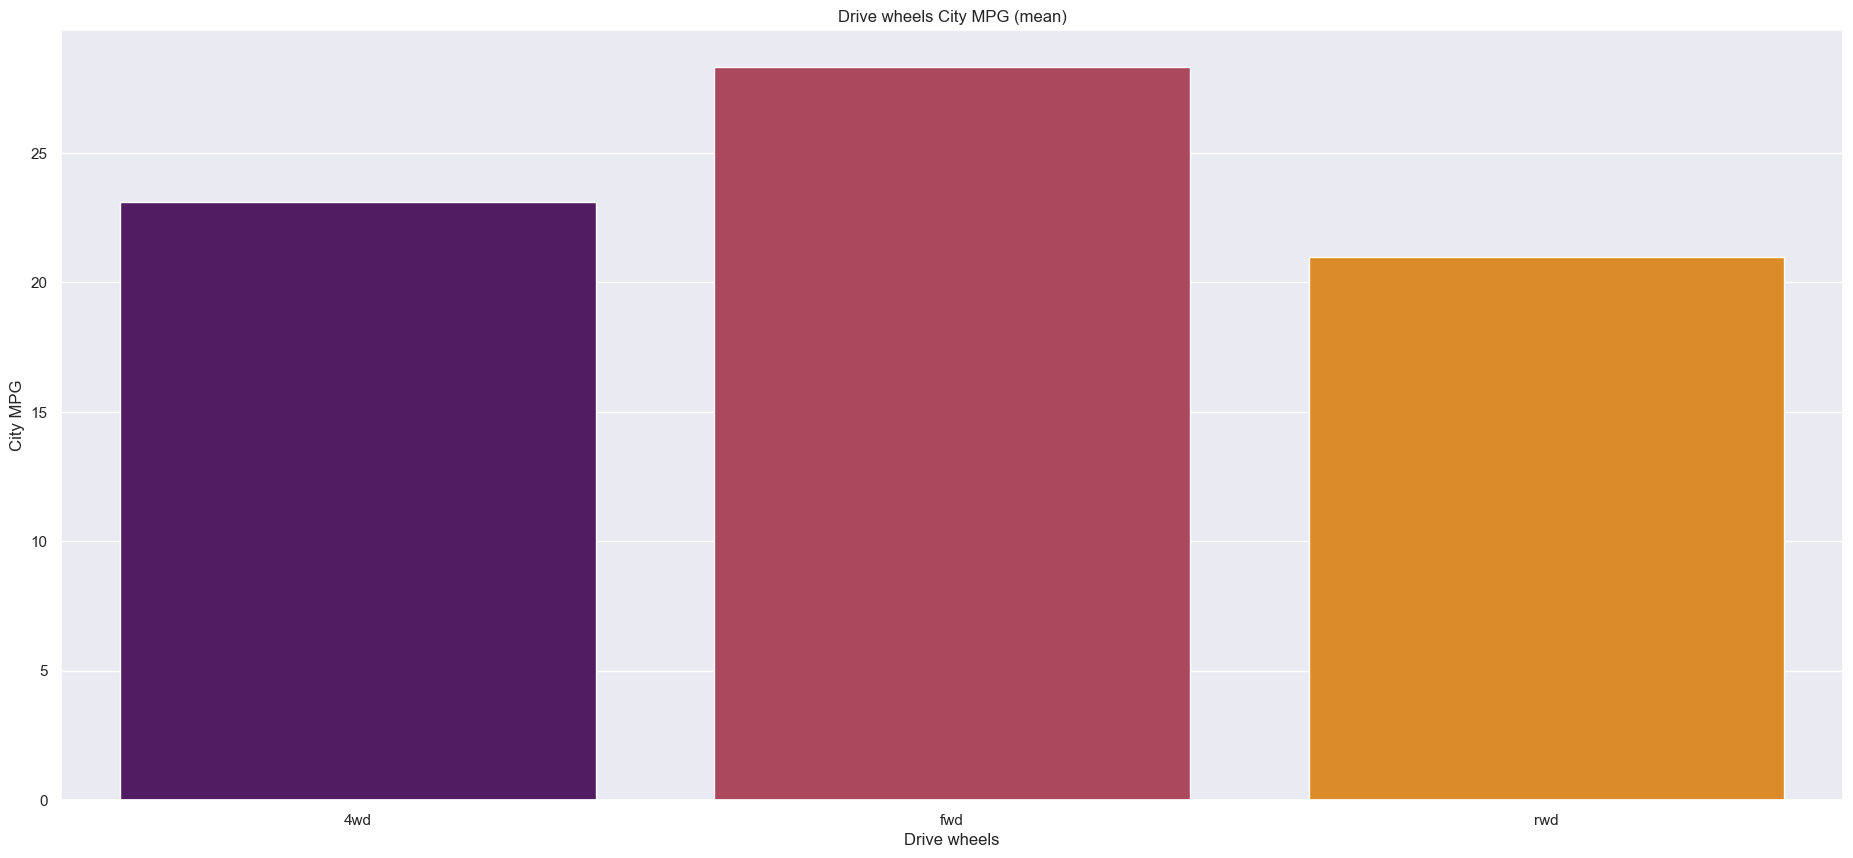

In [66]:
sns.barplot(data = df.groupby('drive-wheels')['city-mpg'].mean().reset_index(), x = 'drive-wheels', y = 'city-mpg', palette = 'inferno')
plt.title("Drive wheels City MPG (mean)")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels')
plt.xticks(rotation = 0);

## Roda dan highway MPG bar char

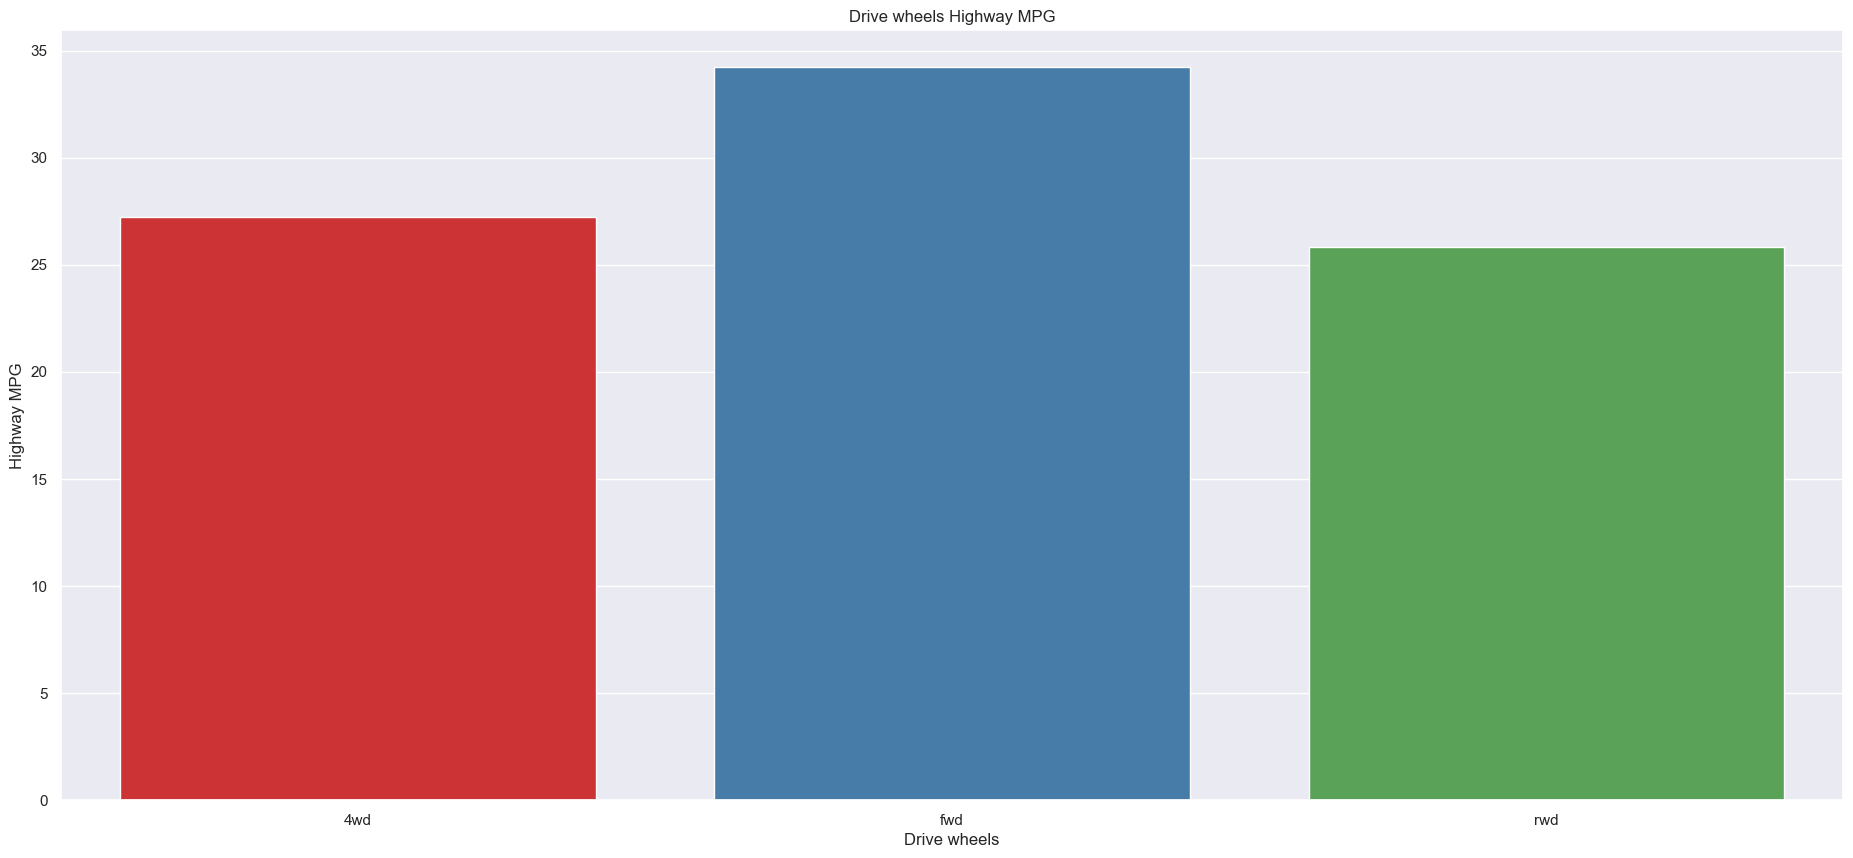

In [67]:
sns.barplot(data = df.groupby('drive-wheels')['highway-mpg'].mean().reset_index(), x = 'drive-wheels', y = 'highway-mpg', palette = 'Set1')
plt.title("Drive wheels Highway MPG")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels')
plt.xticks(rotation = 0);

## Boxplot of Drive wheels and Pric

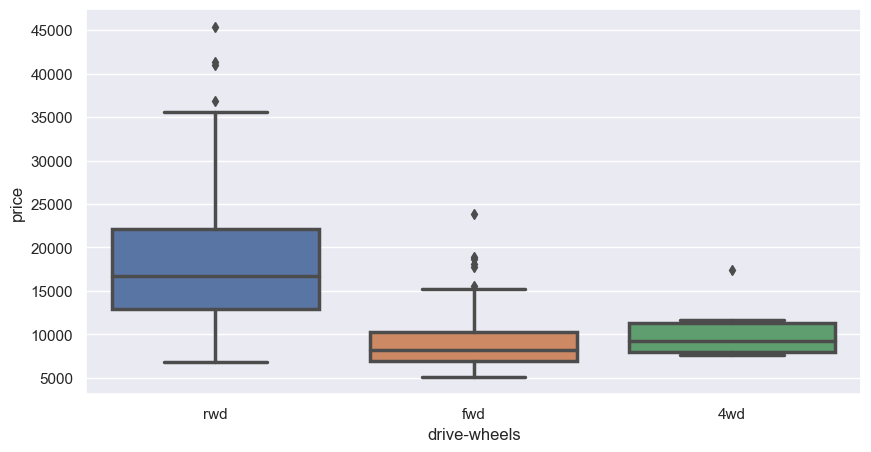

In [68]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=df)

## Normalized losses based on body style and no. of doors

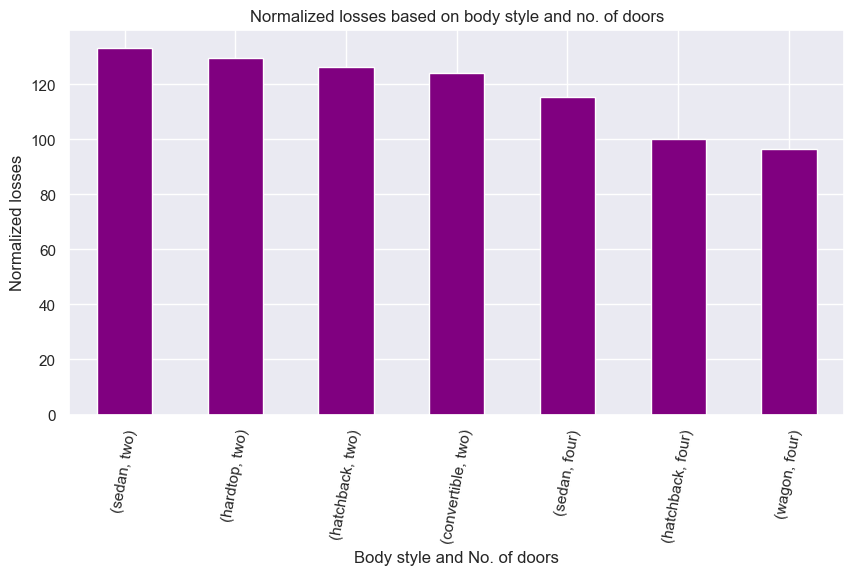

In [69]:
df.groupby(['body-style','num-of-doors'])['normalized-losses'].mean().sort_values(ascending = False).plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors')
plt.xticks(rotation = 80);

## Jenis mobil terbanyak di dataset

In [70]:
mobil_terbanyak = df['merk_mobil'].value_counts()

In [71]:
mobil_terbanyak

toyota           30
mazda            16
nissan           15
mitsubishi       13
honda            13
subaru           12
volkswagen       11
peugot           11
volvo            11
mercedes-benz     8
dodge             8
audi              7
plymouth          7
saab              6
bmw               6
isuzu             4
chevrolet         3
alfa-romero       3
jaguar            2
renault           2
mercury           1
porsche           1
Name: merk_mobil, dtype: int64

In [72]:
# 10 mobil terbanyak
mobil_terbanyak = df['merk_mobil'].value_counts().index
mobil_terbanyak

Index(['toyota', 'mazda', 'nissan', 'mitsubishi', 'honda', 'subaru',
       'volkswagen', 'peugot', 'volvo', 'mercedes-benz', 'dodge', 'audi',
       'plymouth', 'saab', 'bmw', 'isuzu', 'chevrolet', 'alfa-romero',
       'jaguar', 'renault', 'mercury', 'porsche'],
      dtype='object')

### Bentuk grafik

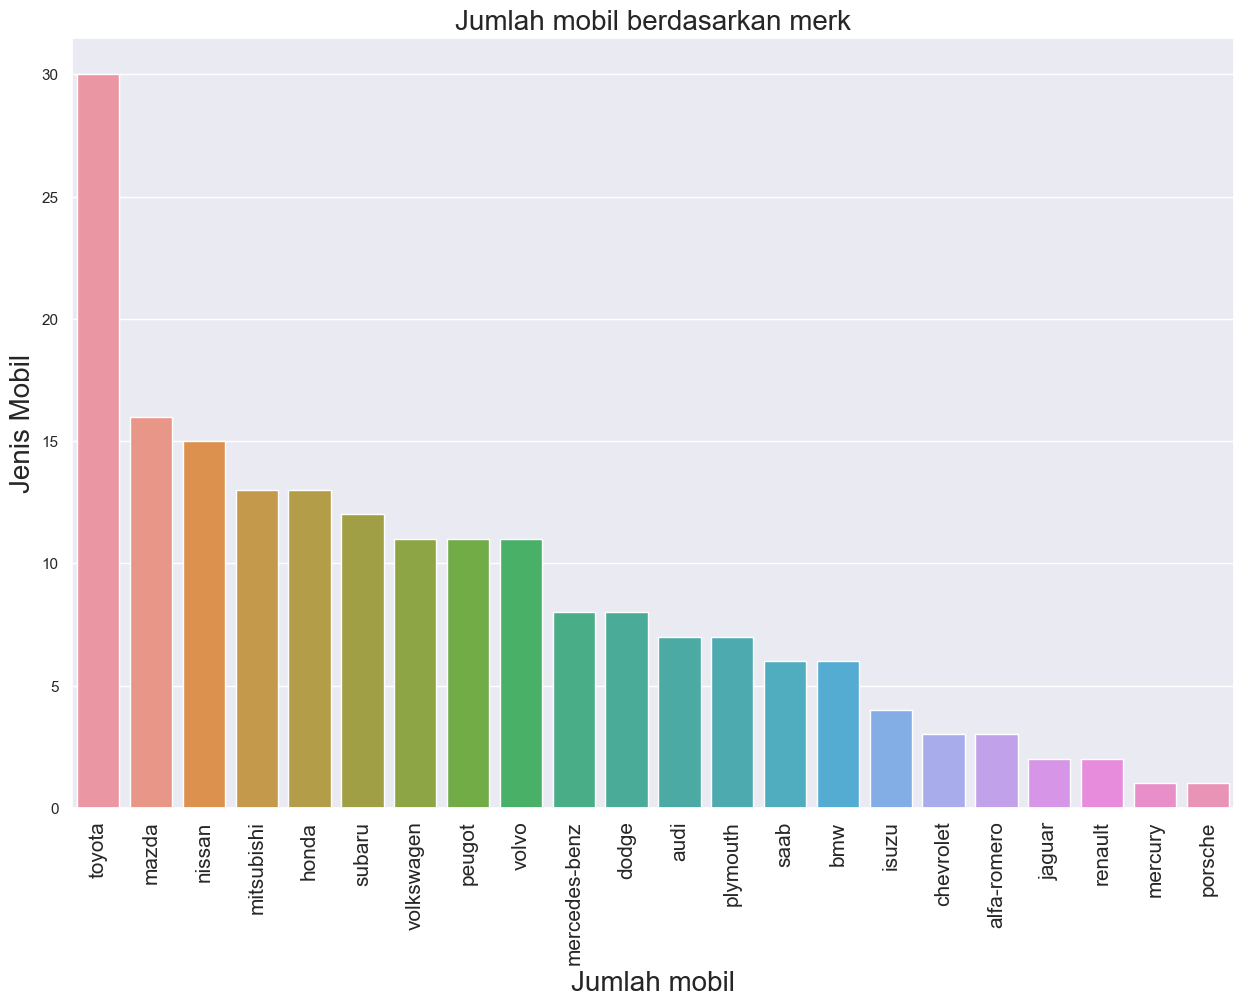

In [73]:
plt.figure(figsize = (15,10))
sns.countplot(data = df, x = 'merk_mobil' , order = mobil_terbanyak)
plt.title ('Jumlah mobil berdasarkan merk', size = 20)
plt.xlabel('Jumlah mobil', size = 20)
plt.ylabel('Jenis Mobil', size = 20)
plt.xticks(rotation = 90, size =15);

## Jenis BBM terbanyak

In [74]:
bbm_terbanyak = df.groupby(['fuel-type'])['aspiration'].value_counts()

In [75]:
bbm_terbanyak

fuel-type  aspiration
diesel     turbo          13
           std             6
gas        std           149
           turbo          22
Name: aspiration, dtype: int64

## Bentuk Grafik

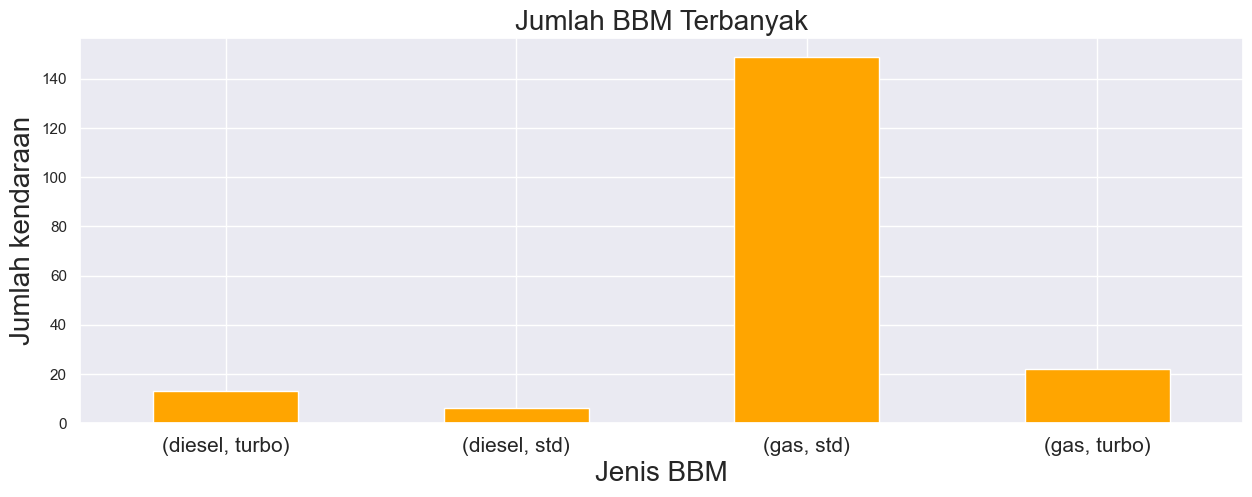

In [76]:
plt.figure(figsize = (15,5))
bbm_terbanyak.plot(kind = 'bar', color = 'orange')
plt.title ('Jumlah BBM Terbanyak', size = 20)
plt.xlabel('Jenis BBM', size = 20)
plt.ylabel('Jumlah kendaraan', size = 20)
plt.xticks(rotation = 0, size = 15);

## 5 mobil dengan horsepower terbesar

In [77]:
hbesar = df.groupby('merk_mobil')['horsepower'].mean().sort_values(ascending = False)
hbesar.reset_index().set_index('merk_mobil').round(2).head(10)

,horsepower
merk_mobil,
jaguar,176.00
mercury,175.00
bmw,151.50
mercedes-benz,146.25
porsche,143.00
volvo,128.00
saab,126.67
alfa-romero,125.33
audi,121.00


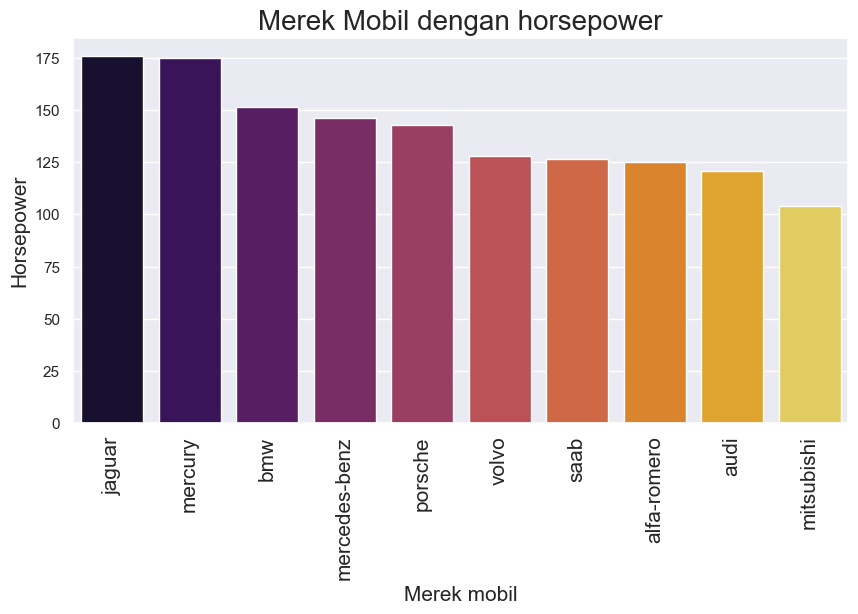

In [78]:
hbesar = df.groupby('merk_mobil')['horsepower'].mean().sort_values(ascending = False).reset_index().head(10)
sns.barplot(data = hbesar, x = 'merk_mobil', y = 'horsepower', palette = 'inferno')
plt.title ('Merek Mobil dengan horsepower', size = 20)
plt.xlabel('Merek mobil', size = 15)
plt.ylabel('Horsepower', size = 15)
plt.xticks(rotation = 90, size = 15);

## Daftar mobil bertipe gas dan sedan

In [79]:
mobil_gas_sedan = df[(df['fuel-type']=='gas')&(df['body-style']=='sedan')][['merk_mobil','fuel-type','body-style']].value_counts().reset_index()
mobil_gas_sedan = mobil_gas_sedan.reset_index()
mobil_gas_sedan = mobil_gas_sedan.rename(columns = {0:'Jumlah mobil'})
mobil_gas_sedan

,index,merk_mobil,fuel-type,body-style,Jumlah mobil
0,0,toyota,gas,sedan,8
1,1,nissan,gas,sedan,8
2,2,volvo,gas,sedan,7
3,3,bmw,gas,sedan,6
4,4,mazda,gas,sedan,5
5,5,volkswagen,gas,sedan,5
6,6,subaru,gas,sedan,5
7,7,audi,gas,sedan,5
8,8,honda,gas,sedan,5
9,9,peugot,gas,sedan,4


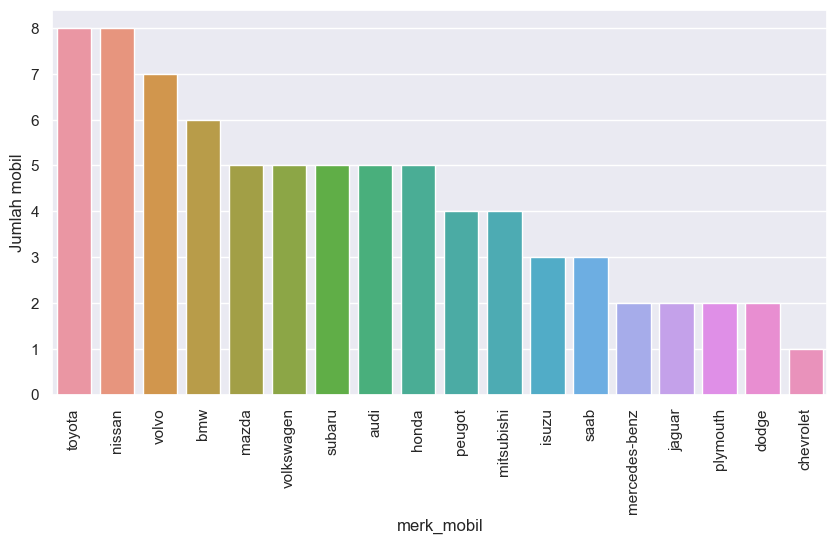

In [80]:
sns.barplot(data = mobil_gas_sedan, x = 'merk_mobil', y ='Jumlah mobil')
plt.xticks(rotation = 90);

# Membuat machine learning untuk memprediksi harga

In [81]:
df.head()

,symboling,normalized-losses,merk_mobil,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450


C:\Users\amati\AppData\Local\Temp\ipykernel_13092\2396587795.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


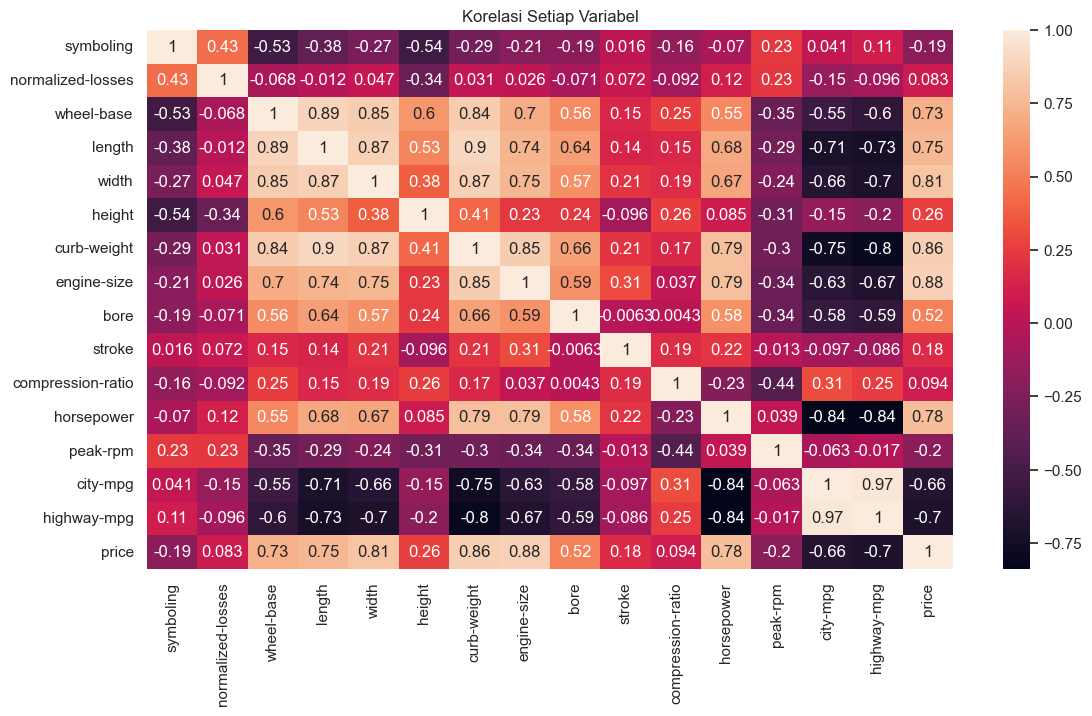

In [135]:
# cari tahu terlebih dahulu korelasi antar variabel
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(), annot = True)
plt.title('Korelasi Setiap Variabel');

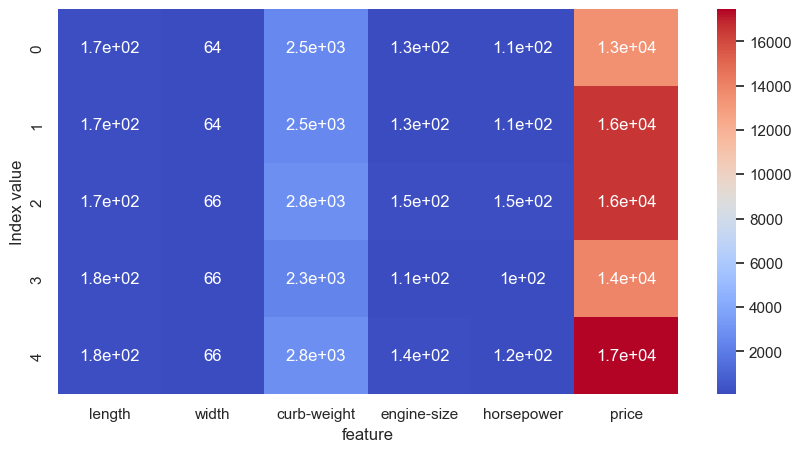

In [195]:
#terlihat price tidak berkaitan erat dengan symboling, normallized-losses,wheel-base,length,height dan bore,stroke,compression-ratio
#dalam kasus ini hanya mengambil korelasi yang berada di atas 60%
#price berkaitan erat dengan width,curb-weight,engine-size,horsepower
df_ml = df[['length','width','curb-weight','engine-size','horsepower','price']]
sns.heatmap(df_ml.head(), annot = True, cmap = 'coolwarm')
plt.ylabel('Index value')
plt.xlabel('feature');

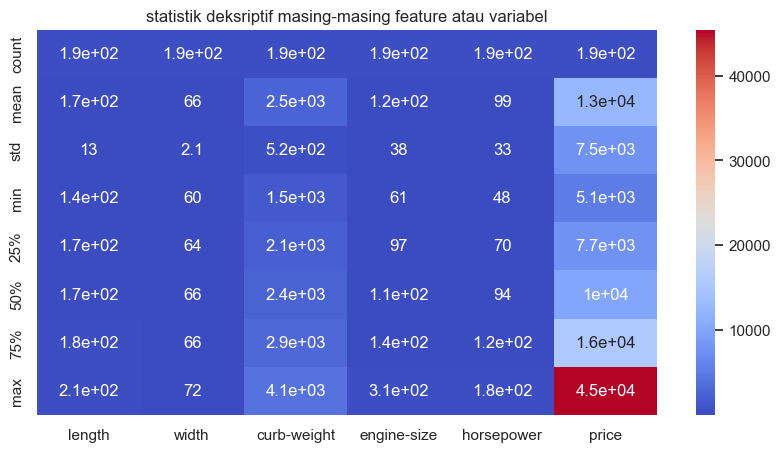

In [196]:
sns.heatmap(df_ml.describe(), annot =True, cmap = 'coolwarm')
plt.title('statistik deksriptif masing-masing feature atau variabel');

## Feature Engineering


In [197]:
#pisahkan dataset
X = df_ml.drop(columns = 'price')
y = df_ml['price']


In [198]:
#standarisasi nilai
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

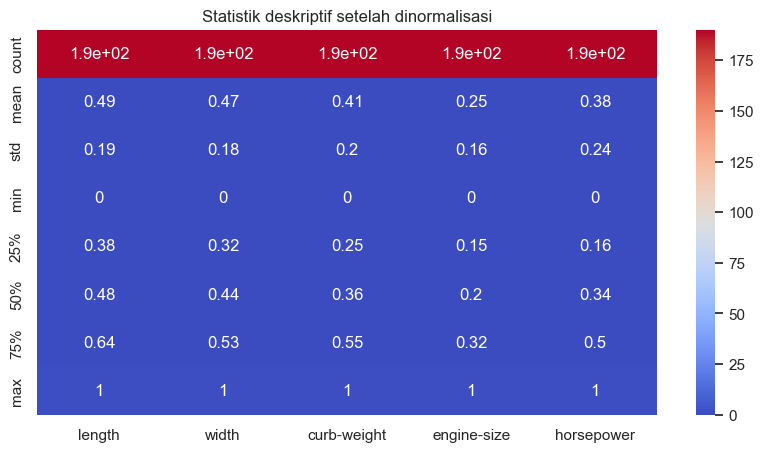

In [221]:
sns.heatmap(pd.DataFrame(X, columns = ['length','width','curb-weight','engine-size','horsepower']).describe(), annot = True,cmap = 'coolwarm')
plt.title('Statistik deskriptif setelah dinormalisasi');

In [202]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 190, dtype: int32

## Splitting

In [203]:
# pisahkan data set dengan test 20%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [224]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(152, 5)
(152,)
(38, 5)
(38,)


## Linear Regression

In [237]:
#Modelling pertama menggunakan regresi linear
from sklearn.linear_model import LinearRegression
ln = LinearRegression().fit(X_train,y_train)
ln_predict = ln.predict(X_test)

In [238]:
# lohat keberhasilan model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,ln_predict).round(2))
print("Mean Squared Error (MSE):", mean_squared_error(y_test,ln_predict).round(2))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test,ln_predict)).round(2))
print("r2:", r2_score(y_test,ln_predict).round(4))


Mean Absolute Error (MAE): 2614.12
Mean Squared Error (MSE): 11772774.91
Root Mean Squared Error (RMSE): 3431.15
r2: 0.8798


In [239]:
x = pd.DataFrame({'asli':y_test,
            'prediksi':ln_predict})
x.sample(5)

,asli,prediksi
21,5572,5617.440264
195,13415,16654.991047
112,16900,18796.407379
48,35550,33122.641413
183,7975,9581.200147


''

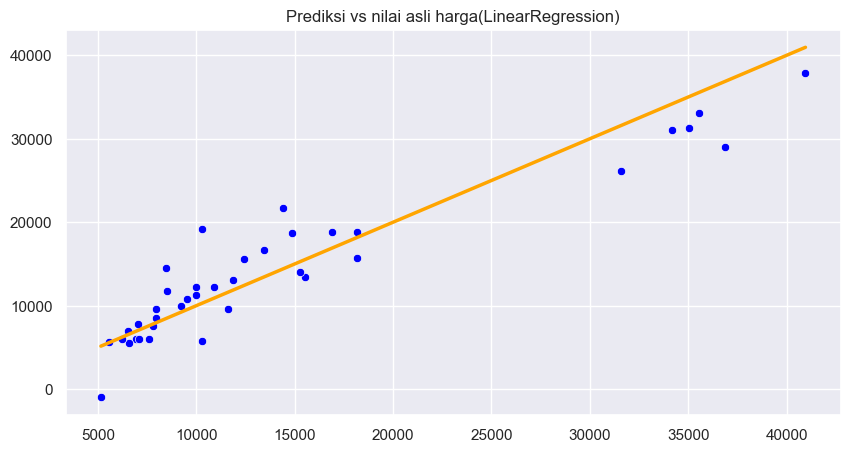

In [240]:
sns.lineplot(data = x, x='asli', y = 'asli' , color = 'orange')
sns.scatterplot(data = x, x='asli', y = 'prediksi' , color = 'blue')
plt.title('Prediksi vs nilai asli harga(LinearRegression)')
plt.xlabel('')
plt.ylabel('')
;

## DecisionTreeRegresor

In [241]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 42).fit(X_train,y_train)
tree_predict = tree.predict(X_test)

In [242]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,tree_predict).round(2))
print("Mean Squared Error (MAE):", mean_squared_error(y_test,tree_predict).round(2))
print("Root Mean Squared Error (MAE):", np.sqrt(mean_squared_error(y_test,tree_predict)).round(2))
print("r2:", r2_score(y_test,tree_predict).round(4))

Mean Absolute Error (MAE): 1642.58
Mean Squared Error (MAE): 5521894.26
Root Mean Squared Error (MAE): 2349.87
r2: 0.9436


In [243]:
x = pd.DataFrame({'asli':y_test,
            'prediksi':tree_predict})

''

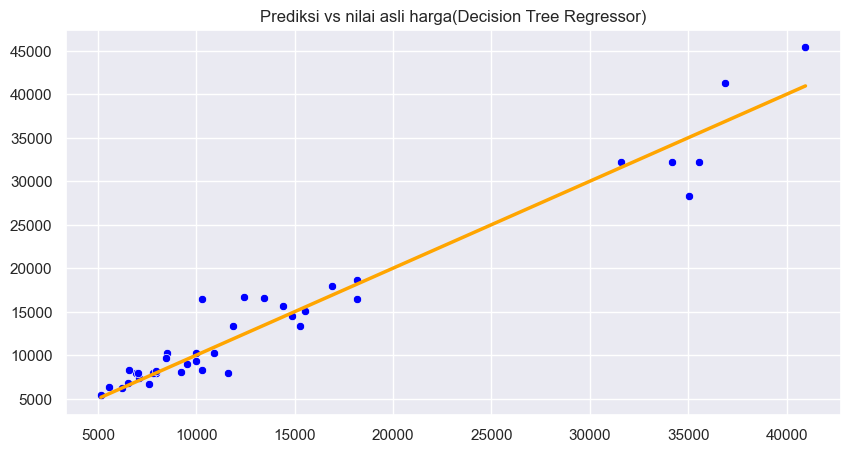

In [244]:
sns.lineplot(data = x, x='asli', y = 'asli' , color = 'orange')
sns.scatterplot(data = x, x='asli', y = 'prediksi' , color = 'blue')
plt.title('Prediksi vs nilai asli harga(Decision Tree Regressor)')
plt.xlabel('')
plt.ylabel('')
;

## Support Vector Regression 

In [245]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear', C = 1e3)
svr = svr.fit(X_train,y_train)
svr_predict = svr.predict(X_test)

In [246]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,svr_predict).round(2))
print("Mean Squared Error (MAE):", mean_squared_error(y_test,svr_predict).round(2))
print("Root Mean Squared Error (MAE):", np.sqrt(mean_squared_error(y_test,svr_predict)).round(2))
print("r2:", r2_score(y_test,svr_predict).round(4))

Mean Absolute Error (MAE): 3549.26
Mean Squared Error (MAE): 33212798.55
Root Mean Squared Error (MAE): 5763.05
r2: 0.661


In [247]:
x = pd.DataFrame({'asli':y_test,
            'prediksi':svr_predict})

''

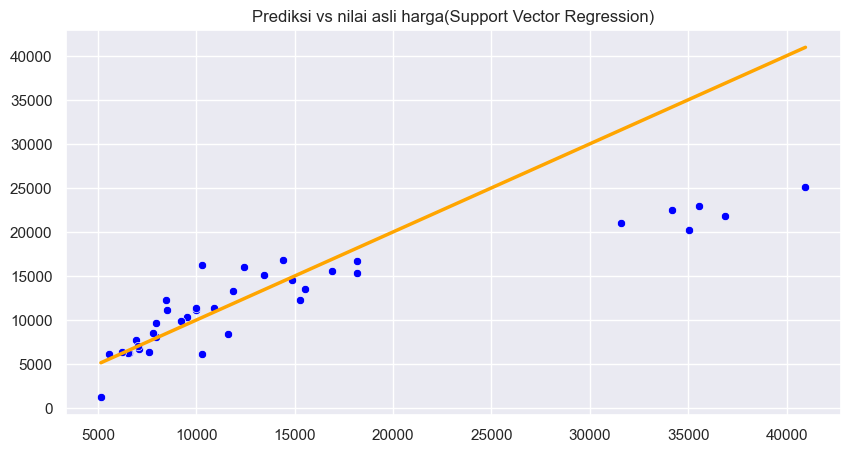

In [248]:
sns.lineplot(data = x, x='asli', y = 'asli' , color = 'orange')
sns.scatterplot(data = x, x='asli', y = 'prediksi' , color = 'blue')
plt.title('Prediksi vs nilai asli harga(Support Vector Regression)')
plt.xlabel('')
plt.ylabel('')
;

## Random forest regressor


In [249]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state= 42).fit(X_train,y_train)
forest_predict = forest.predict(X_test)

In [250]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,forest_predict).round(2))
print("Mean Squared Error (MAE):", mean_squared_error(y_test,forest_predict).round(2))
print("Root Mean Squared Error (MAE):", np.sqrt(mean_squared_error(y_test,forest_predict)).round(2))
print("r2:", r2_score(y_test,forest_predict).round(4))

Mean Absolute Error (MAE): 1389.57
Mean Squared Error (MAE): 4575706.99
Root Mean Squared Error (MAE): 2139.09
r2: 0.9533


In [251]:
x = pd.DataFrame({'asli':y_test,
            'prediksi':forest_predict})

''

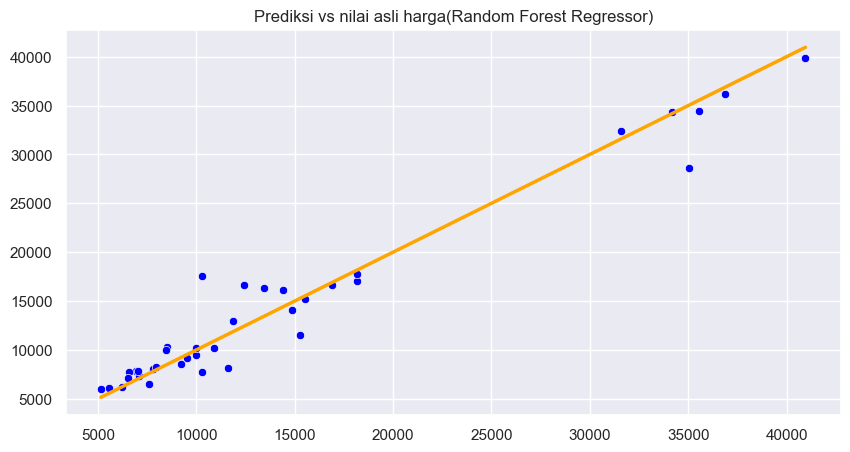

In [252]:
sns.lineplot(data = x, x='asli', y = 'asli' , color = 'orange')
sns.scatterplot(data = x, x='asli', y = 'prediksi' , color = 'blue')
plt.title('Prediksi vs nilai asli harga(Random Forest Regressor)')
plt.xlabel('')
plt.ylabel('')
;

In [257]:
socre_ml = pd.DataFrame({'Model Machine Learning':['Linear Regression','Decision Tree Regressor',
                                        'Support Vector Regressor', 'Random Forest Regressor'],
             'r2_score':[0.8798,0.9436,0.661,0.9533],
                        'MAE':[2614.12,1642.58,3549.26,1389.57],
                        'RMSE':[3431.15,2349.87,5763.05,2139.09]})

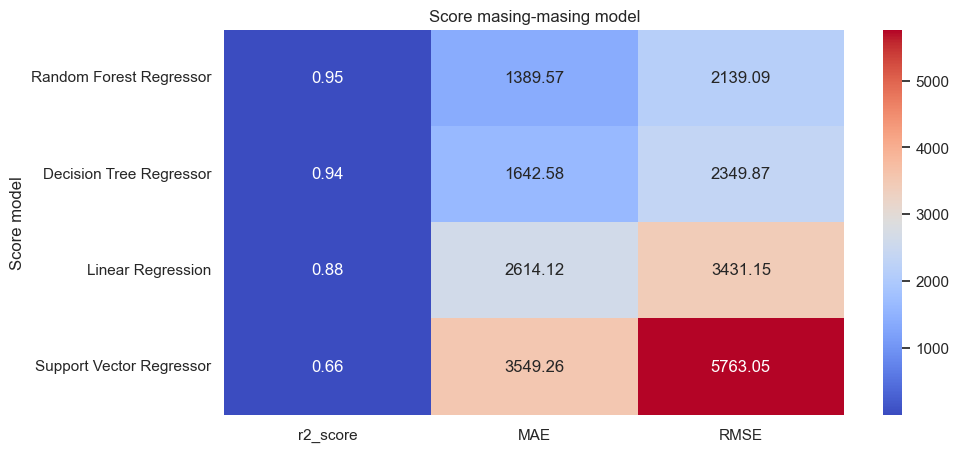

In [265]:
sns.heatmap(socre_ml.sort_values(by = 'r2_score', ascending = False).set_index('Model Machine Learning'), annot = True, cmap = 'coolwarm', fmt ='.2f')
plt.title('Score masing-masing model')
plt.ylabel('Score model');